# IDEAS DATA VISUALIZATION COMPETITION
# DANTE
# OUR TEAM:
- M. Ikwan Alif

- Sahrial Ihsani Ishak

SGD Point 8
# Dataset Used:
- https://data.worldbank.org/indicator/NY.GDP.PCAP.CD (GDP)
- https://www.ilo.org/global/research/global-reports/global-employment-trends/2014/WCMS_234879/lang--en/index.htm (EMPLOYMENT)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Important Libraries

In [2]:
#Load Library
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
!pip install seaborn notebook
from datetime import datetime as date_time
import functools
import os
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as ply
from datetime import datetime as date_time
!pip install umap-learn
from umap import UMAP
import plotly.graph_objs as go
!pip install pycountry
print("Import Success")
import matplotlib as mpl
mpl.style.use('ggplot')

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 1.1MB 19.1MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=644bae75c9c200a3ae804ac7bfe98ce66c41bc2df43f41804205be62692cfdf0
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.4-cp37-none-any.whl size=52374 sha256=bd81901026b1f2323e8b50e30c8130c19afaf971467fab4d2c5419712b2103f6
  Stored in directory: /root/.cache/pip/wheels/42/4b/8c/f6f119c67cf6583bb192431fa8f7278cf95e5b943055077d94
Successfully built umap-learn pynndescent
     |████████████████████████████████| 10.1MB 20.0MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=0d86bf677480a2e05951dcde84a208907e9e613a625648365fa8358c62ebbfe2
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c

In [3]:
from plotly.offline import iplot

# Preprocessing Data

In [4]:
#Display raw dataset
data = pd.read_csv('/content/drive/MyDrive/gdp.csv')
data = data.fillna(0)
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,127.651518,130.353642,134.693838,142.159769,150.881897,161.073294,169.460786,181.245107,190.509423,208.707988,220.512563,235.010954,247.397499,314.706366,381.067655,394.683534,385.819322,419.837546,447.507715,525.232153,666.056080,673.777642,623.957120,639.640901,577.237128,490.345006,541.604003,641.267796,657.826222,655.786850,696.152646,703.654678,682.586851,665.242926,659.589902,722.169716,701.734197,718.854278,660.471966,635.143368,672.205474,591.088444,589.206824,757.449759,916.603367,1037.727057,1142.955902,1278.971341,1356.529948,1326.251549,1550.121225,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,144.368395,128.620051,129.678996,143.757635,195.490684,169.168529,200.226910,241.782075,333.289875,377.898463,444.504298,454.923088,482.618500,584.544785,718.901922,1317.316549,1136.794683,816.139286,656.904776,651.700457,585.078292,584.290054,561.525598,510.568346,594.899600,558.599040,547.823071,438.262311,376.354921,459.364903,495.779036,486.523016,484.090742,500.436180,502.031662,516.927934,605.061007,681.882359,826.816538,988.839394,1224.057612,1400.086007,1666.899847,1444.201899,1655.130138,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1

In [5]:
dataset = data.drop(['Country Code','Indicator Code','Indicator Name'],axis=1)
dataset

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
1,Africa Eastern and Southern,127.651518,130.353642,134.693838,142.159769,150.881897,161.073294,169.460786,181.245107,190.509423,208.707988,220.512563,235.010954,247.397499,314.706366,381.067655,394.683534,385.819322,419.837546,447.507715,525.232153,666.056080,673.777642,623.957120,639.640901,577.237128,490.345006,541.604003,641.267796,657.826222,655.786850,696.152646,703.654678,682.586851,665.242926,659.589902,722.169716,701.734197,718.854278,660.471966,635.143368,672.205474,591.088444,589.206824,757.449759,916.603367,1037.727057,1142.955902,1278.971341,1356.529948,1326.251549,1550.121225,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
2,Afghanistan,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,144.368395,128.620051,129.678996,143.757635,195.490684,169.168529,200.226910,241.782075,333.289875,377.898463,444.504298,454.923088,482.618500,584.544785,718.901922,1317.316549,1136.794683,816.139286,656.904776,651.700457,585.078292,584.290054,561.525598,510.568346,594.899600,558.599040,547.823071,438.262311,376.354921,459.364903,495.779036,486.523016,484.090742,500.436180,502.031662,516.927934,605.061007,681.882359,826.816538,988.839394,1224.057612,1400.086007,1666.899847,1444.201899,1655.130138,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,0.000000,

In [6]:
world = dataset.rename(columns={'Country Name':'country','Unnamed: 65':'2021','Country Code':'country_code'})
world

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
1,Africa Eastern and Southern,127.651518,130.353642,134.693838,142.159769,150.881897,161.073294,169.460786,181.245107,190.509423,208.707988,220.512563,235.010954,247.397499,314.706366,381.067655,394.683534,385.819322,419.837546,447.507715,525.232153,666.056080,673.777642,623.957120,639.640901,577.237128,490.345006,541.604003,641.267796,657.826222,655.786850,696.152646,703.654678,682.586851,665.242926,659.589902,722.169716,701.734197,718.854278,660.471966,635.143368,672.205474,591.088444,589.206824,757.449759,916.603367,1037.727057,1142.955902,1278.971341,1356.529948,1326.251549,1550.121225,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
2,Afghanistan,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,144.368395,128.620051,129.678996,143.757635,195.490684,169.168529,200.226910,241.782075,333.289875,377.898463,444.504298,454.923088,482.618500,584.544785,718.901922,1317.316549,1136.794683,816.139286,656.904776,651.700457,585.078292,584.290054,561.525598,510.568346,594.899600,558.599040,547.823071,438.262311,376.354921,459.364903,495.779036,486.523016,484.090742,500.436180,502.031662,516.927934,605.061007,681.882359,826.816538,988.839394,1224.057612,1400.086007,1666.899847,1444.201899,1655.130138,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,0.000000,0.000

In [7]:
world.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,213.300583,223.784415,258.855345,276.048974,300.366151,359.253259,407.911729,428.633784,453.233085,490.961372,489.107982,555.154164,638.068486,788.620645,1025.057553,1231.955078,1347.162793,1497.955954,1666.039130,1997.309774,2497.492304,2489.310599,2420.510041,2325.656837,2312.742374,2321.304316,2623.434426,3019.062114,3320.196530,3404.357582,3952.028743,3978.718887,4172.135617,4155.847266,4410.008556,5164.793081,5353.594557,5340.631435,5554.980133,6905.230468,6963.099446,6950.035757,7636.500198,8736.437538,9931.875175,10733.569183,12026.889081,13765.227824,14758.347789,13251.029346,13937.408887,15554.808801,15424.471059,16009.324056,16281.935694,14744.645501,14857.706459,15614.278307,16541.257049,14871.165167,10597.716091
std,509.504266,532.502104,569.522151,608.268109,663.564177,757.509896,835.057258,871.617338,909.397566,983.745110,1185.847855,1323.671893,1549.873757,1927.964527,2442.540806,3152.487626,3445.175340,3781.237584,4087.665484,4923.824723,5949.600582,5689.669848,5212.327797,4837.064629,4722.202905,4714.743873,5566.558063,6627.744398,7214.038761,7304.270019,8572.085883,8706.734984,9307.050184,8960.688379,9571.750844,10984.673858,11201.829430,10663.783577,11102.813727,12418.073425,12044.113582,12026.744465,12964.099543,14994.587468,16954.466960,17868.819510,19895.079696,22822.634739,24256.160980,21257.301651,21845.742375,24003.711648,23256.032246,24792.405497,25487.114141,23000.748862,23248.651806,24067.814064,25716.884436,23123.718903,17218.104990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.263787,159.774740,172.523209,306.268701,250.340886,211.332003,287.394843,265.232306,363.265545,387.432075,402.365309,407.429176,438.310721,502.031662,516.927934,574.929776,646.192471,753.375904,842.812631,967.679584,1129.299685,1356.529948,1267.317394,1489.459087,1672.907535,1760.467407,1840.729073,1861.462891,1658.514663,1666.422406,1813.807434,1747.506594,1655.050693,973.271855
50%,0.000000,0.000000,0.000000,0.000000,0.000000,59.501774,84.985252,96.339136,105.614406,113.508383,114.556675,131.098436,134.819585,161.538179,182.020018,223.674864,243.562073,291.254992,319.941808,362.495964,501.137494,632.140431,666.350225,661.887936,609.978402,593.815247,628.754850,707.575540,792.419269,786.878927,911.424816,893.4852

In [8]:
world[world['country'].duplicated()]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [9]:
world.shape

(265, 62)

In [10]:
for country in world['country'].unique():
    print(country)

Aruba
Africa Eastern and Southern
Afghanistan
Africa Western and Central
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo
Colombia
Comoros
Cabo Verde
Costa Rica
Caribbean small states
Cuba
Curacao
Cayman Islands
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Ecuador
Egypt
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and conflict affected situations
Finland
Fiji
France
Faroe Islands
Micron

In [11]:
asia= world.loc[(world['country'] == 'Taiwan')|(world['country'] == 'Turkey')|(world['country'] == 'Myanmar')|(world['country'] == 'East Timor')|(world['country'] == 'Afghanistan')|(world['country'] == 'Armenia')|(world['country'] == 'Azerbaijan')|(world['country'] == 'Bahrain')|(world['country'] == 'Bangladesh')|(world['country'] == 'Bhutan')|(world['country'] == 'Brunei')|(world['country'] == 'Burma')|(world['country'] == 'Cambodia')|(world['country'] == 'China')|(world['country'] == 'Cyprus')|(world['country'] == 'Georgia')|(world['country'] == 'India')|(world['country'] == 'Indonesia')|(world['country'] == 'Iran')|(world['country'] == 'Iraq')|(world['country'] == 'Israel')|(world['country'] == 'Japan')|(world['country'] == 'Jordan')|(world['country'] == 'Kazakhstan')|(world['country'] == 'Kuwait')|(world['country'] == 'Kyrgyzstan')|(world['country'] == 'Laos')|(world['country'] == 'Lebanon')|(world['country'] == 'Malaysia')|(world['country'] == 'Maldives')|(world['country'] == 'Mongolia')|(world['country'] == 'Nepal')|(world['country'] == 'North Korea')|(world['country'] == 'Oman')|(world['country'] == 'Pakistan')|(world['country'] == 'Palestine')|(world['country'] == 'Philippines')|(world['country'] == 'Qatar')|(world['country'] == 'Saudi Arabia')|(world['country'] == 'Singapore')|(world['country'] == 'South Korea')|(world['country'] == 'Sri Lanka')|(world['country'] == 'Syria')|(world['country'] == 'Tajikistan')|(world['country'] == 'Thailand')|(world['country'] == 'Turkmenistan')|(world['country'] == 'United Arab Emirates')|(world['country'] == 'Uzbekistan')|(world['country'] == 'Vietnam')|(world['country'] == 'Yemen')]
display(asia)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
8,United Arab Emirates,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26848.088176,30117.948933,33823.181661,28457.078034,33512.633424,42764.540556,44987.537990,40025.822624,34843.159626,32309.832713,29720.897718,23467.879318,23726.307049,22295.118706,24028.262498,27729.390593,26612.253110,26420.859883,25596.739390,25848.016250,27221.934412,28975.079957,29512.674792,26899.601766,28470.885858,33291.366254,31280.755865,31567.546307,33499.102776,36333.187333,39365.459641,41907.421470,41809.462163,44498.940507,32024.197782,33893.263873,39194.672240,40976.490746,42412.639500,43751.805648,38663.400503,38141.867131,40644.791190,43839.324487,43103.336293,0.000000
10,Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,637.855921,590.505876,369.707232,357.202849,400.515594,456.374933,504.059843,523.284411,609.171654,597.432899,622.740923,694.423455,783.241215,930.125473,1191.921006,1643.756889,2158.148074,3139.280710,4010.861381,2994.340471,3218.378299,3525.807198,3681.844691,3838.173880,3986.231624,3607.289299,3591.828052,3914.527854,4220.540321,4622.738182,4267.452119
15,Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.458623,209.472982,157.076754,314.555087,409.163189,505.500349,561.906808,573.916512,655.119945,703.683843,763.080638,883.733971,1045.009379,1578.402390,2473.081819,3851.437869,5574.603802,4950.294791,5843.533768,7189.691229,7496.294648,7875.756953,7891.313147,5500.310382,3880.738731,4147.089716,4739.841710,4805.753718,4214.311336
20,Bangladesh,0.000000,0.000000,100.122130,101.901413,100.221104,106.646644,112.665365,122.870628,122.847598,135.147381,140.002705,133.551419,94.381677,119.559724,182.020018,277.570605,141.197159,131.373227,176.033947,200.769677,227.751927,247.649617,220.718797,204.417690,213.996639,245.453912,233.658072,253.974474,270.699601,285.829217,306.268701,293.160421,293.644988,300.555748,299.533037,329.424076,394.717492,401.498667,407.429176,409.543184,418.068942,415.034404,413.080283,446.310676,475.291930,499.461940,509.640190,558.051841,634.987070,702.264420,781.153578,861.762162,883.117130,981.860851,1118.873808,1248.453310,1401.564635,1563.767819,1698.132081,1855.691510,1968.792225
22,Bahrain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8537.715870,9269.269617,9446.084577,9421.356947,9590.541794,8706.766601,7041.634447,7554.932192,7958.747925,8031.004820,8529.052127,9055.64440

In [12]:
asia.shape

(42, 62)

In [13]:
for country in asia['country'].unique():
    print(country)

Afghanistan
United Arab Emirates
Armenia
Azerbaijan
Bangladesh
Bahrain
Bhutan
China
Cyprus
Georgia
Indonesia
India
Iran
Iraq
Israel
Jordan
Japan
Kazakhstan
Cambodia
South Korea
Kuwait
Lebanon
Sri Lanka
Maldives
Myanmar
Mongolia
Malaysia
Nepal
Oman
Pakistan
Philippines
North Korea
Qatar
Saudi Arabia
Singapore
Thailand
Tajikistan
Turkmenistan
Turkey
Uzbekistan
Vietnam
Yemen


# GDP and Growth Rate

# World

In [14]:
# Global trend from 2000 to 2019
world_trend = pd.melt(world,id_vars='country',value_vars=world.columns[1:])
world_trend.columns = ['country','year','gdp']
world_gdp_2000 = world_trend[world_trend['country'] == 'World'].reset_index()[['country','year','gdp']]

avg_gdp = world_gdp_2000.gdp
growth_rate = []
for i in range(60):
    growth_rate.append(round(((avg_gdp[i+1]-avg_gdp[i])/avg_gdp[i])*100,3))
growth_rate.append(np.nan)
world_gdp_2000['growth_rate'] = growth_rate

In [15]:
world_gdp_2000

,country,year,gdp,growth_rate
0,World,1960,445.431313,3.178
1,World,1961,459.589101,5.490
2,World,1962,484.819399,5.867
3,World,1963,513.263866,7.511
4,World,1964,551.815610,6.698
...,...,...,...,...
56,World,2016,10294.189706,5.247
57,World,2017,10834.344338,4.969
58,World,2018,11372.727329,0.391
59,World,2019,11417.174060,-4.304


In [16]:
def create_fig(graph_obj,title='',x_title='',y_title=''):
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig

def get_trend_plot(loc,country=False):
    world = world_trend[world_trend['country'] == loc].reset_index()[['year','gdp']]
    gdp_series = world.gdp
    growth_rate = []
    for i in range(60):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    world['growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = world.year,
    y = world.gdp,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = world.year,
    y = world.growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'Gross Domestic Product (Growth in %)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'Gross Domestic Product Trend: ' + loc
    fig2_title = 'Gross Domestic Product Growth Rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','Gross Domestic Product in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','Gross Domestic Product Growth Rate in %')
    
    return fig1, fig2

In [17]:
gdpTrend,rateTrend = get_trend_plot('World')
iplot(gdpTrend)
iplot(rateTrend)

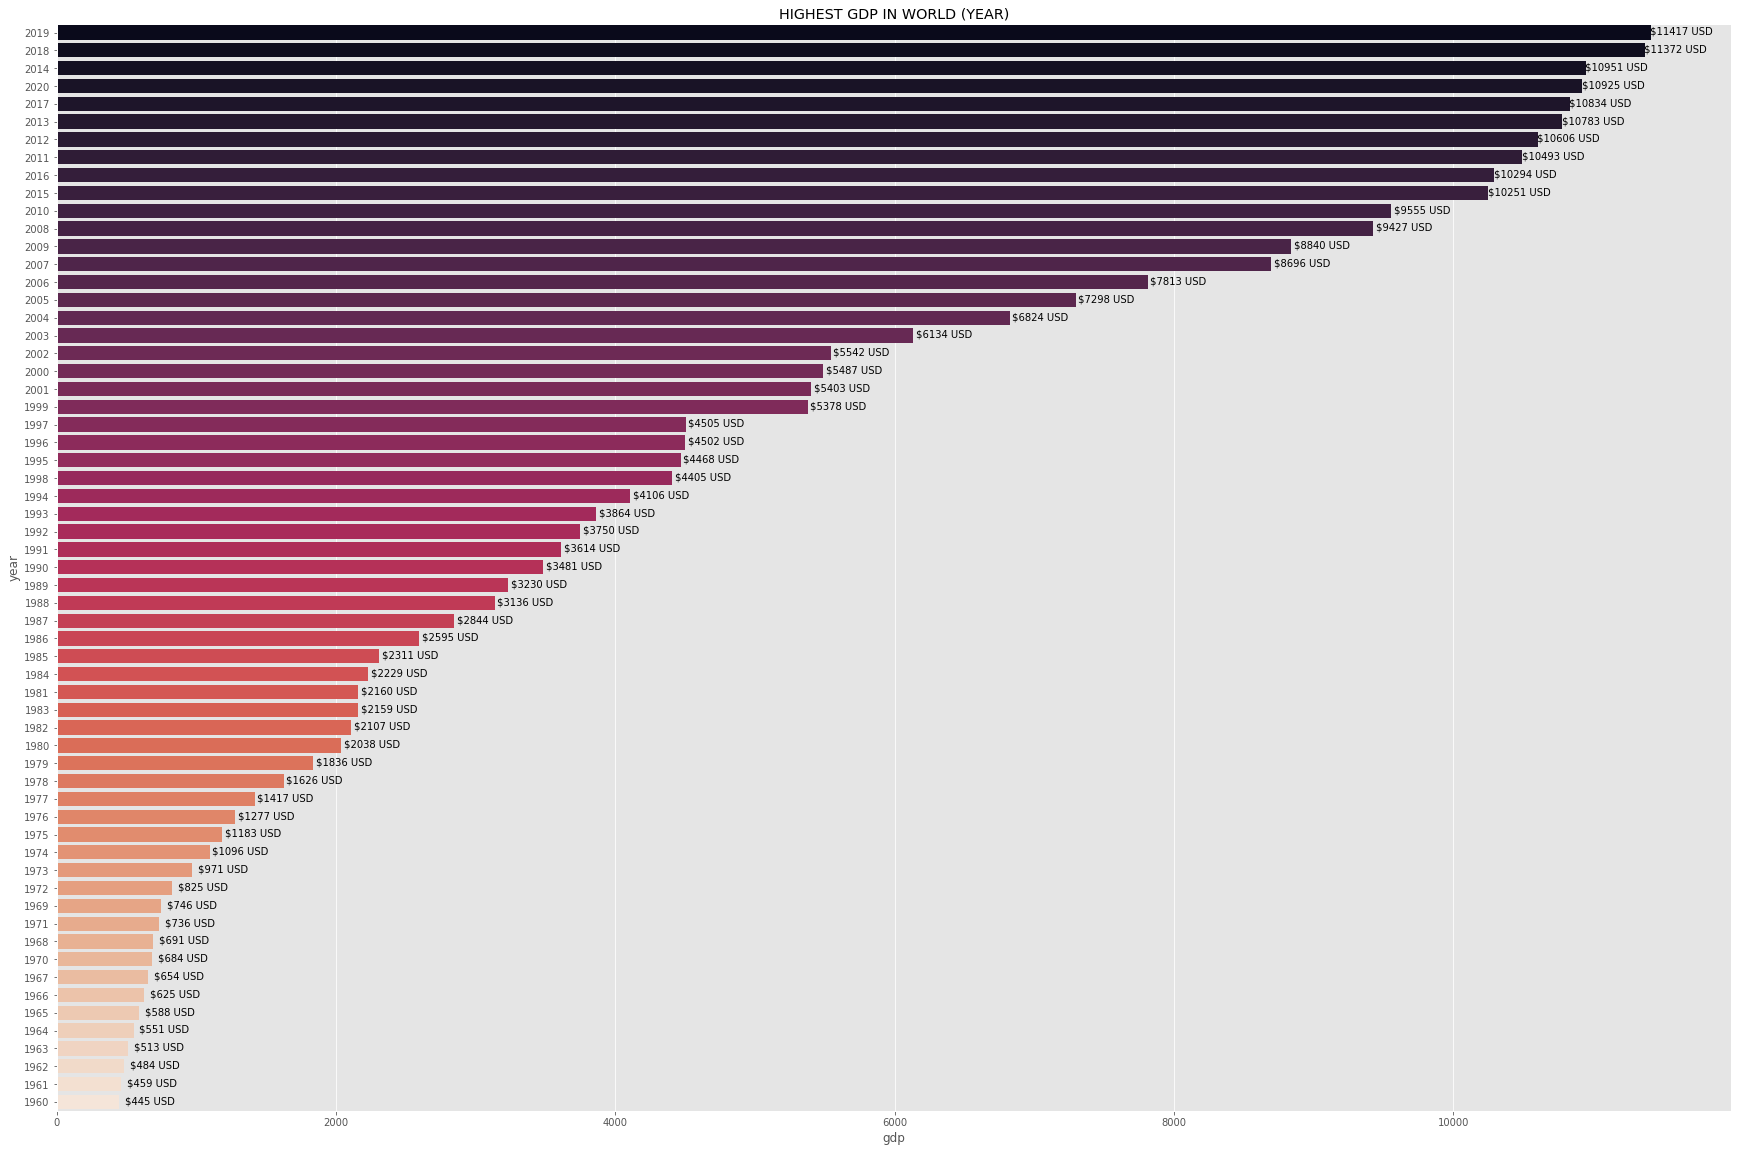

In [18]:
#GDP
import seaborn as sns
world_gdp_2000[['gdp','growth_rate']] = world_gdp_2000[['gdp','growth_rate']].apply(np.int64)
urut_gdp = world_gdp_2000.sort_values('gdp', ascending=False)
figure = plt.figure(figsize=(30,20))
ax = sns.barplot(palette="rocket",y="year", x="gdp", data = urut_gdp)
plt.title('HIGHEST GDP IN WORLD (YEAR)')
for bar, label in zip(ax.patches, urut_gdp['gdp']):
    x = bar.get_y()
    width = bar.get_width()+220
    height = bar.get_height()
    label = f'${label} USD'
    ax.text(height+width,x+0.5, label, ha="center") 

In [19]:
world.shape

(265, 62)

In [20]:
data['Country Code'].unique().size==data['Country Name'].unique().size 

True

In [21]:
import pycountry
list(pycountry.countries)

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia'),
 Country(alpha_2='AS', alpha_3='ASM', nam

In [22]:
countries_list = [ x.alpha_3 for x in pycountry.countries]
result = data['Country Code'].isin(countries_list)
n=[]
for x in range(len(result)):
    if(result[x]==False):
        n.append(x)
len(n)

56

In [23]:
country_all = data.drop(n,axis=0)
country_all.count()

Country Name      209
Country Code      209
Indicator Name    209
Indicator Code    209
1960              209
                 ... 
2016              209
2017              209
2018              209
2019              209
2020              209
Length: 65, dtype: int64

In [24]:
country_all

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230436,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
6,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3238.690261,3496.532023,4218.271599,5342.168560,6320.809632,7169.101006,7151.249909,7751.843307,9127.812280,11818.473343,12378.784511,10372.786050,9610.020616,8025.207641,7728.906695,7775.614217,10361.147765,12615.126177,14304.640595,15165.281255,18878.852313,19534.263630,20549.805575,16515.658395,16235.068038,18458.173993,19016.288188,18355.627860,18895.110661,19262.308991,21854.246803,22970.512213,25067.240064,32272.845891,37966.187252,40064.224929,42674.758968,47804.849934,48719.658770,43504.215652,40850.248143,43334.811413,38686.461264,39540.724814,41303.929371,35770.776704,37475.635059,38964.904478,41791.969837,40897.330873,0.000000
...,...,...,...,...,.

In [25]:
country_all_normalization = country_all.drop(['Country Code','Indicator Code','Indicator Name'],axis=1)

In [26]:
country_all_normalization

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
2,Afghanistan,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
4,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869
5,Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230436,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
6,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3238.690261,3496.532023,4218.271599,5342.168560,6320.809632,7169.101006,7151.249909,7751.843307,9127.812280,11818.473343,12378.784511,10372.786050,9610.020616,8025.207641,7728.906695,7775.614217,10361.147765,12615.126177,14304.640595,15165.281255,18878.852313,19534.263630,20549.805575,16515.658395,16235.068038,18458.173993,19016.288188,18355.627860,18895.110661,19262.308991,21854.246803,22970.512213,25067.240064,32272.845891,37966.187252,40064.224929,42674.758968,47804.849934,48719.658770,43504.215652,40850.248143,43334.811413,38686.461264,39540.724814,41303.929371,35770.776704,37475.635059,38964.904478,41791.969837,40897.330873,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Samoa,0.000000,0.000000,0.000000,0.000000,0.0000

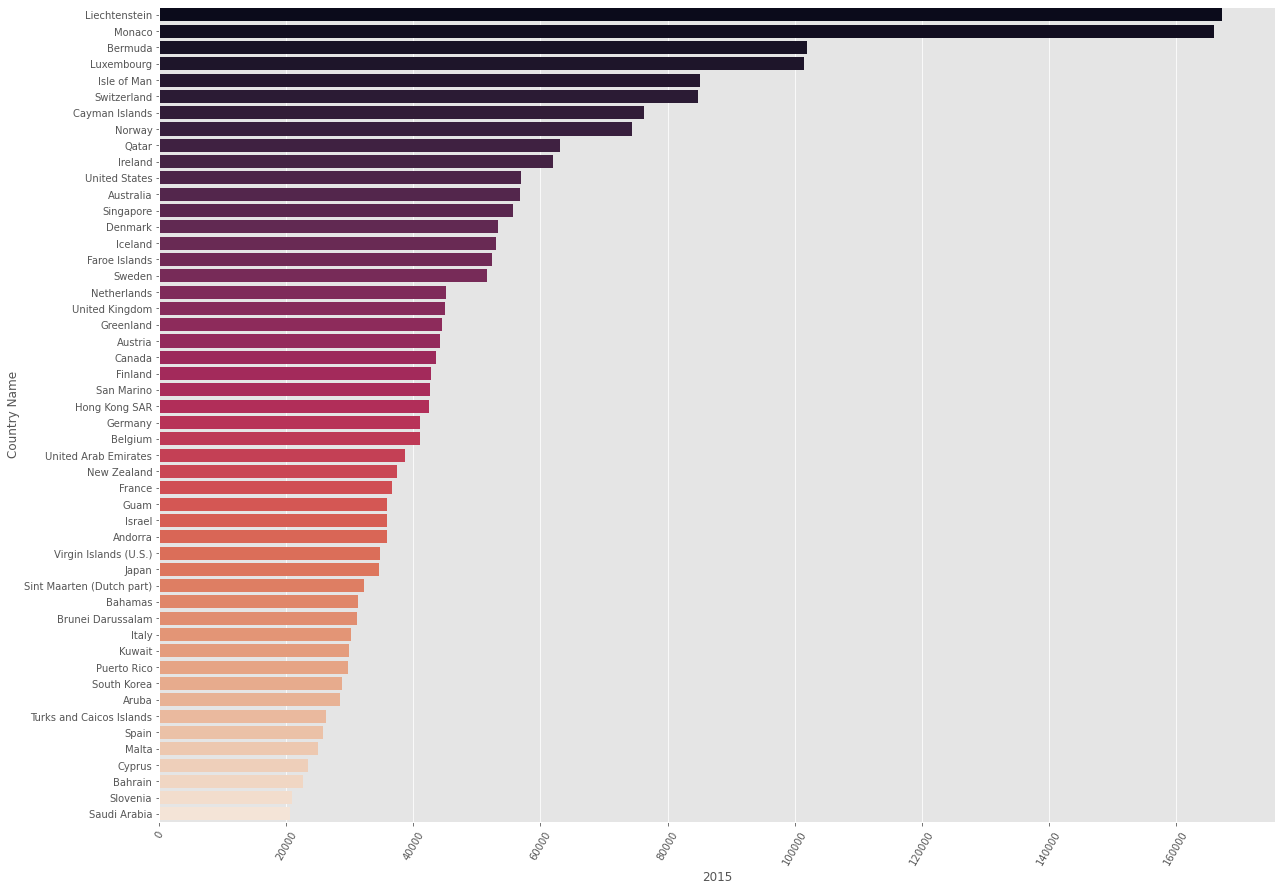

In [27]:
#Top 50 Rank in #Top 50 Rank in 2015
plt.figure(figsize=(20, 15))
gdp_2019 = country_all[['Country Name','2015']].sort_values(by='2015', ascending=False)
plt.xticks(rotation=60)
sns.barplot(x='2015', y='Country Name', data=gdp_2019.head(50),palette='rocket')

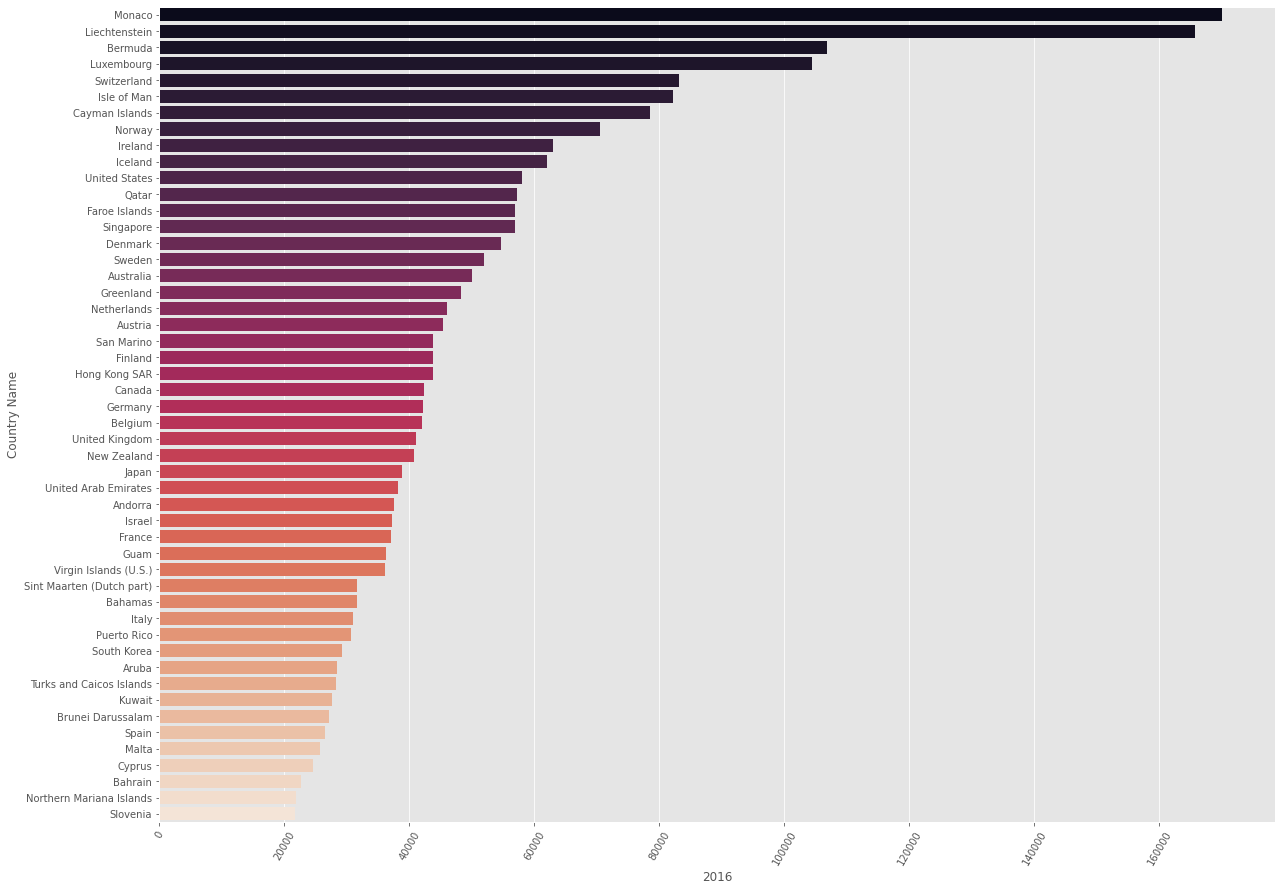

In [28]:
#Top 50 Rank in 2016
plt.figure(figsize=(20, 15))
gdp_2019 = country_all[['Country Name','2016']].sort_values(by='2016', ascending=False)
plt.xticks(rotation=60)
sns.barplot(x='2016', y='Country Name', data=gdp_2019.head(50),palette='rocket')

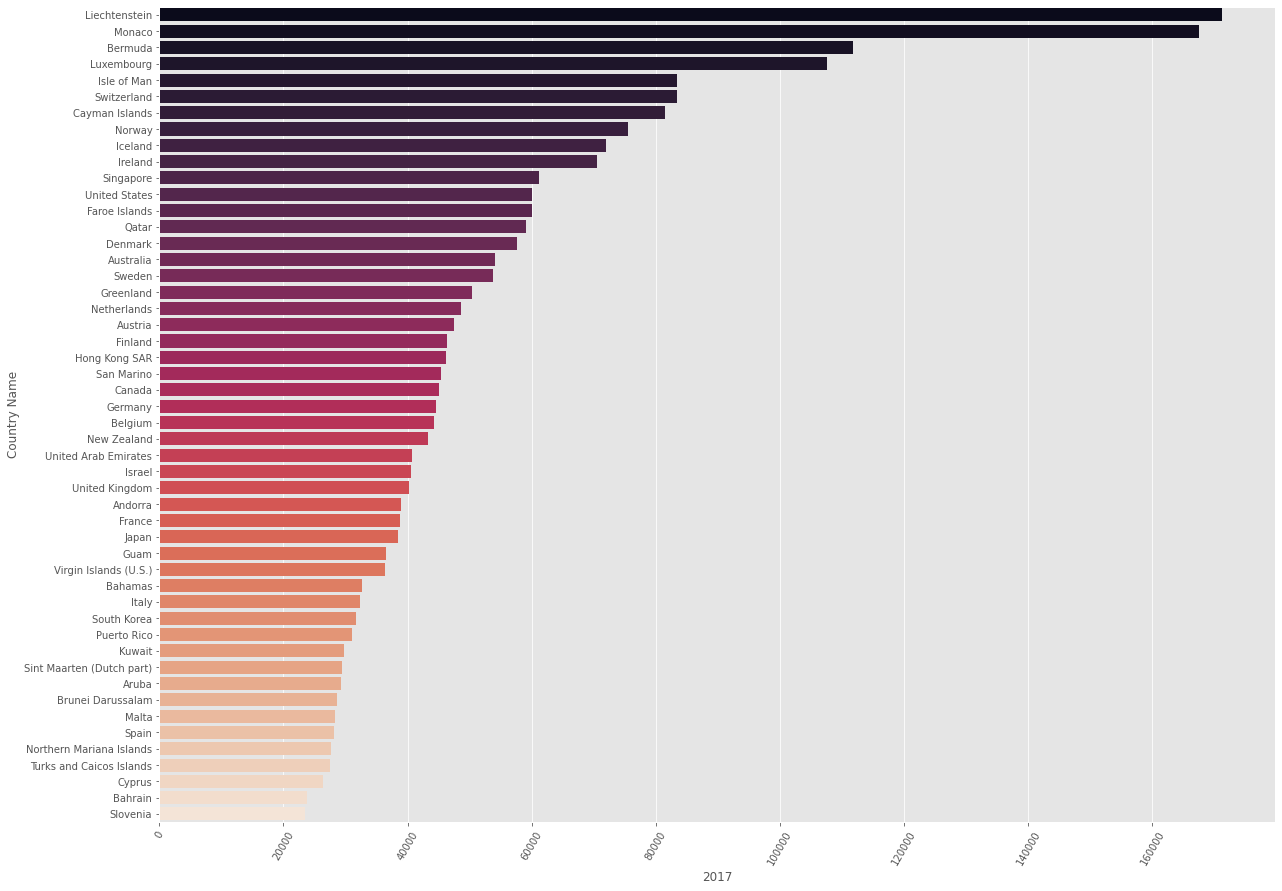

In [29]:
#Top 50 Rank in 2017
plt.figure(figsize=(20, 15))
gdp_2019 = country_all[['Country Name','2017']].sort_values(by='2017', ascending=False)
plt.xticks(rotation=60)
sns.barplot(x='2017', y='Country Name', data=gdp_2019.head(50),palette='rocket')

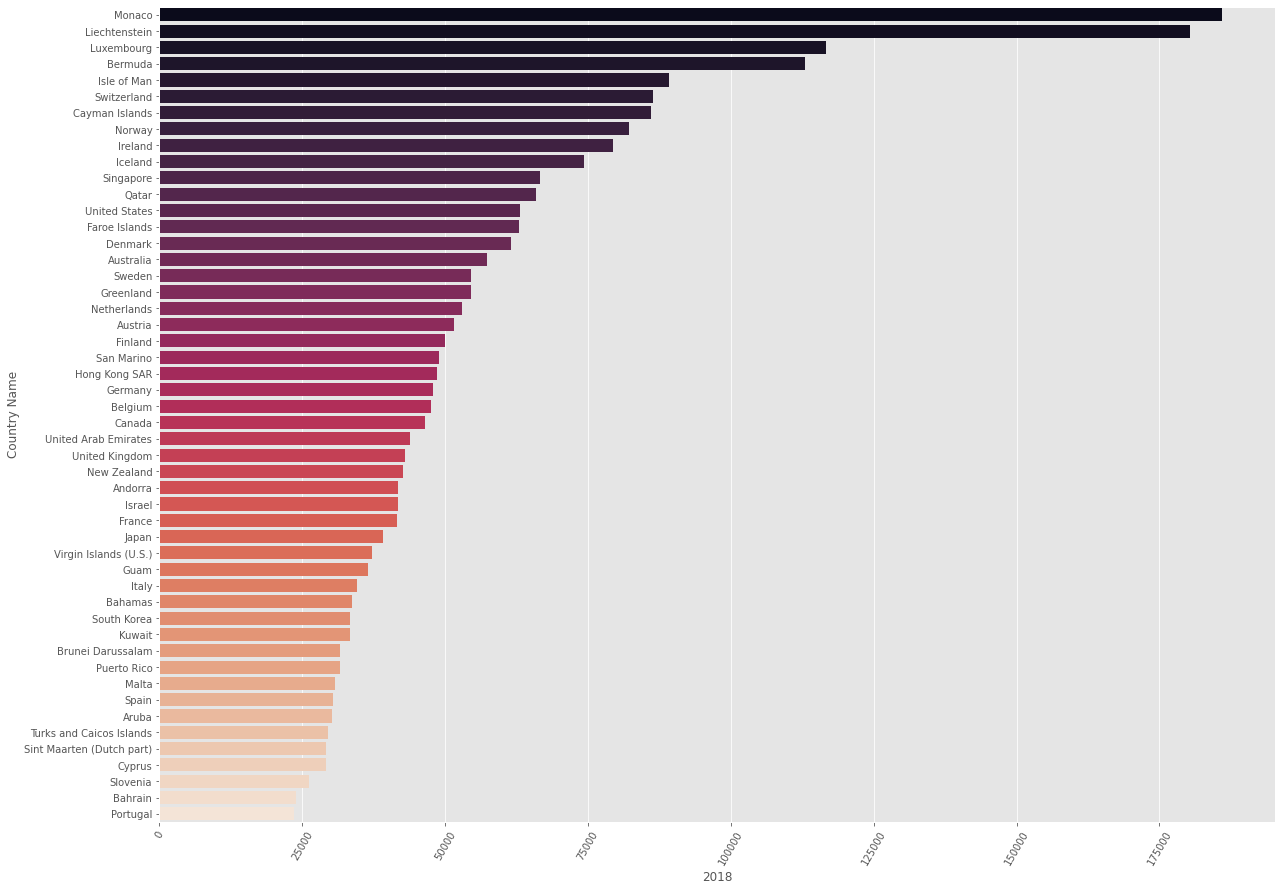

In [30]:
#Top 50 Rank in 2018
plt.figure(figsize=(20, 15))
gdp_2019 = country_all[['Country Name','2018']].sort_values(by='2018', ascending=False)
plt.xticks(rotation=60)
sns.barplot(x='2018', y='Country Name', data=gdp_2019.head(50),palette='rocket')

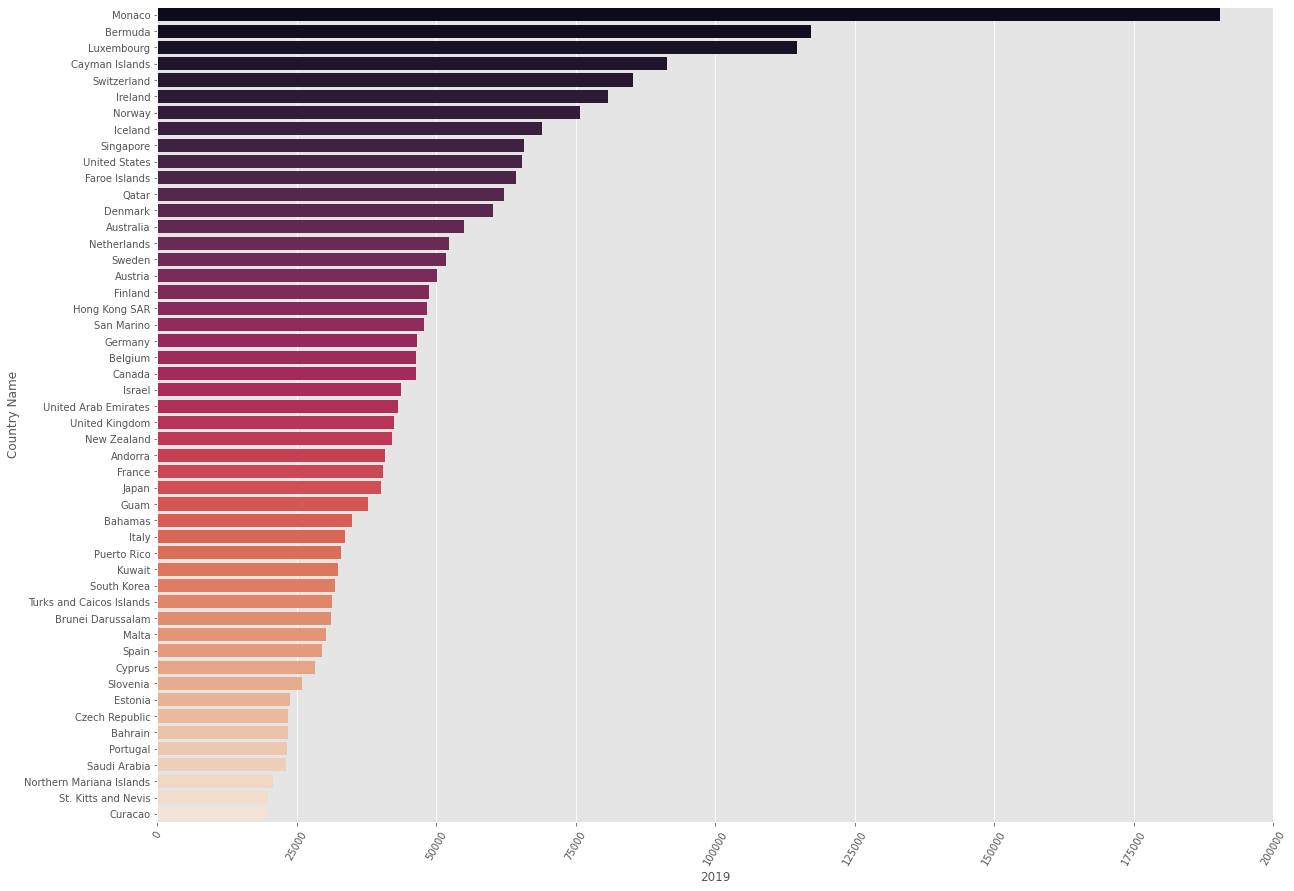

In [31]:
#Top 50 Rank in 2019
plt.figure(figsize=(20, 15))
gdp_2019 = country_all[['Country Name','2019']].sort_values(by='2019', ascending=False)
plt.xticks(rotation=60)
sns.barplot(x='2019', y='Country Name', data=gdp_2019.head(50),palette='rocket')

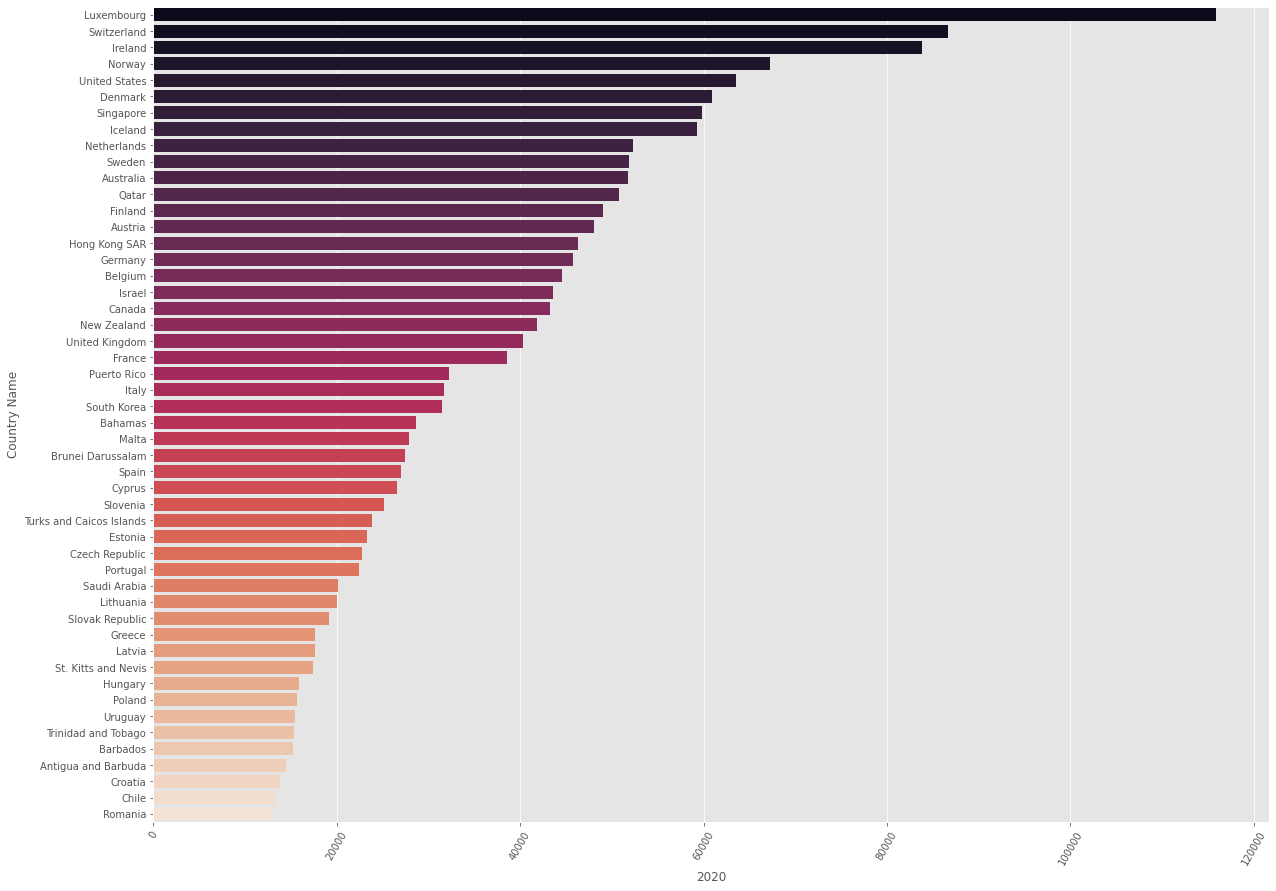

In [32]:
#Top 50 Rank in 2019
plt.figure(figsize=(20, 15))
gdp_2019 = country_all[['Country Name','2020']].sort_values(by='2020', ascending=False)
plt.xticks(rotation=60)
sns.barplot(x='2020', y='Country Name', data=gdp_2019.head(50),palette='rocket')

#Asia

# South Asia

In [33]:
# South Asia trend from 1960 to 2019
saarc_trend = pd.melt(world,id_vars='country',value_vars=asia.columns[1:])
saarc_trend.columns = ['country','year','gdp']
asian_gdp = saarc_trend[(saarc_trend['country'] == 'South Asia')].reset_index()[['year','gdp']]

avg_gdp_asia = asian_gdp.gdp
growth_rate = []
for i in range(60):
    growth_rate.append(round(((avg_gdp_asia[i+1]-avg_gdp_asia[i])/avg_gdp_asia[i])*100,3))
growth_rate.append(np.nan)
asian_gdp['growth_rate'] = growth_rate

In [34]:
asian_gdp

,year,gdp,growth_rate
0,1960,82.302579,4.088
1,1961,85.667017,4.954
2,1962,89.911328,10.085
3,1963,98.978580,12.019
4,1964,110.874644,5.060
...,...,...,...
56,2016,1652.196000,13.032
57,2017,1867.505482,1.428
58,2018,1894.169093,3.441
59,2019,1959.342256,-7.881


In [35]:
def create_fig(graph_obj,title='',x_title='',y_title=''):
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig
def get_trend_plot(loc,country=False):
    asia = saarc_trend[saarc_trend['country'] == loc].reset_index()[['year','gdp']]
    gdp_series = asia.gdp
    growth_rate = []
    for i in range(60):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    asia['growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = asia.year,
    y = asia.gdp,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = asia.year,
    y = asia.growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'Gross Domestic Product (Growth in %)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'Gross Domestic Product Trend: ' + loc
    fig2_title = 'Gross Domestic Product Growth Rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','Gross Domestic Product in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','Gross Domestic Product Growth Rate in %')
    
    return fig1, fig2

In [36]:
gdpTrend,rateTrend = get_trend_plot('South Asia')
iplot(gdpTrend)
iplot(rateTrend)

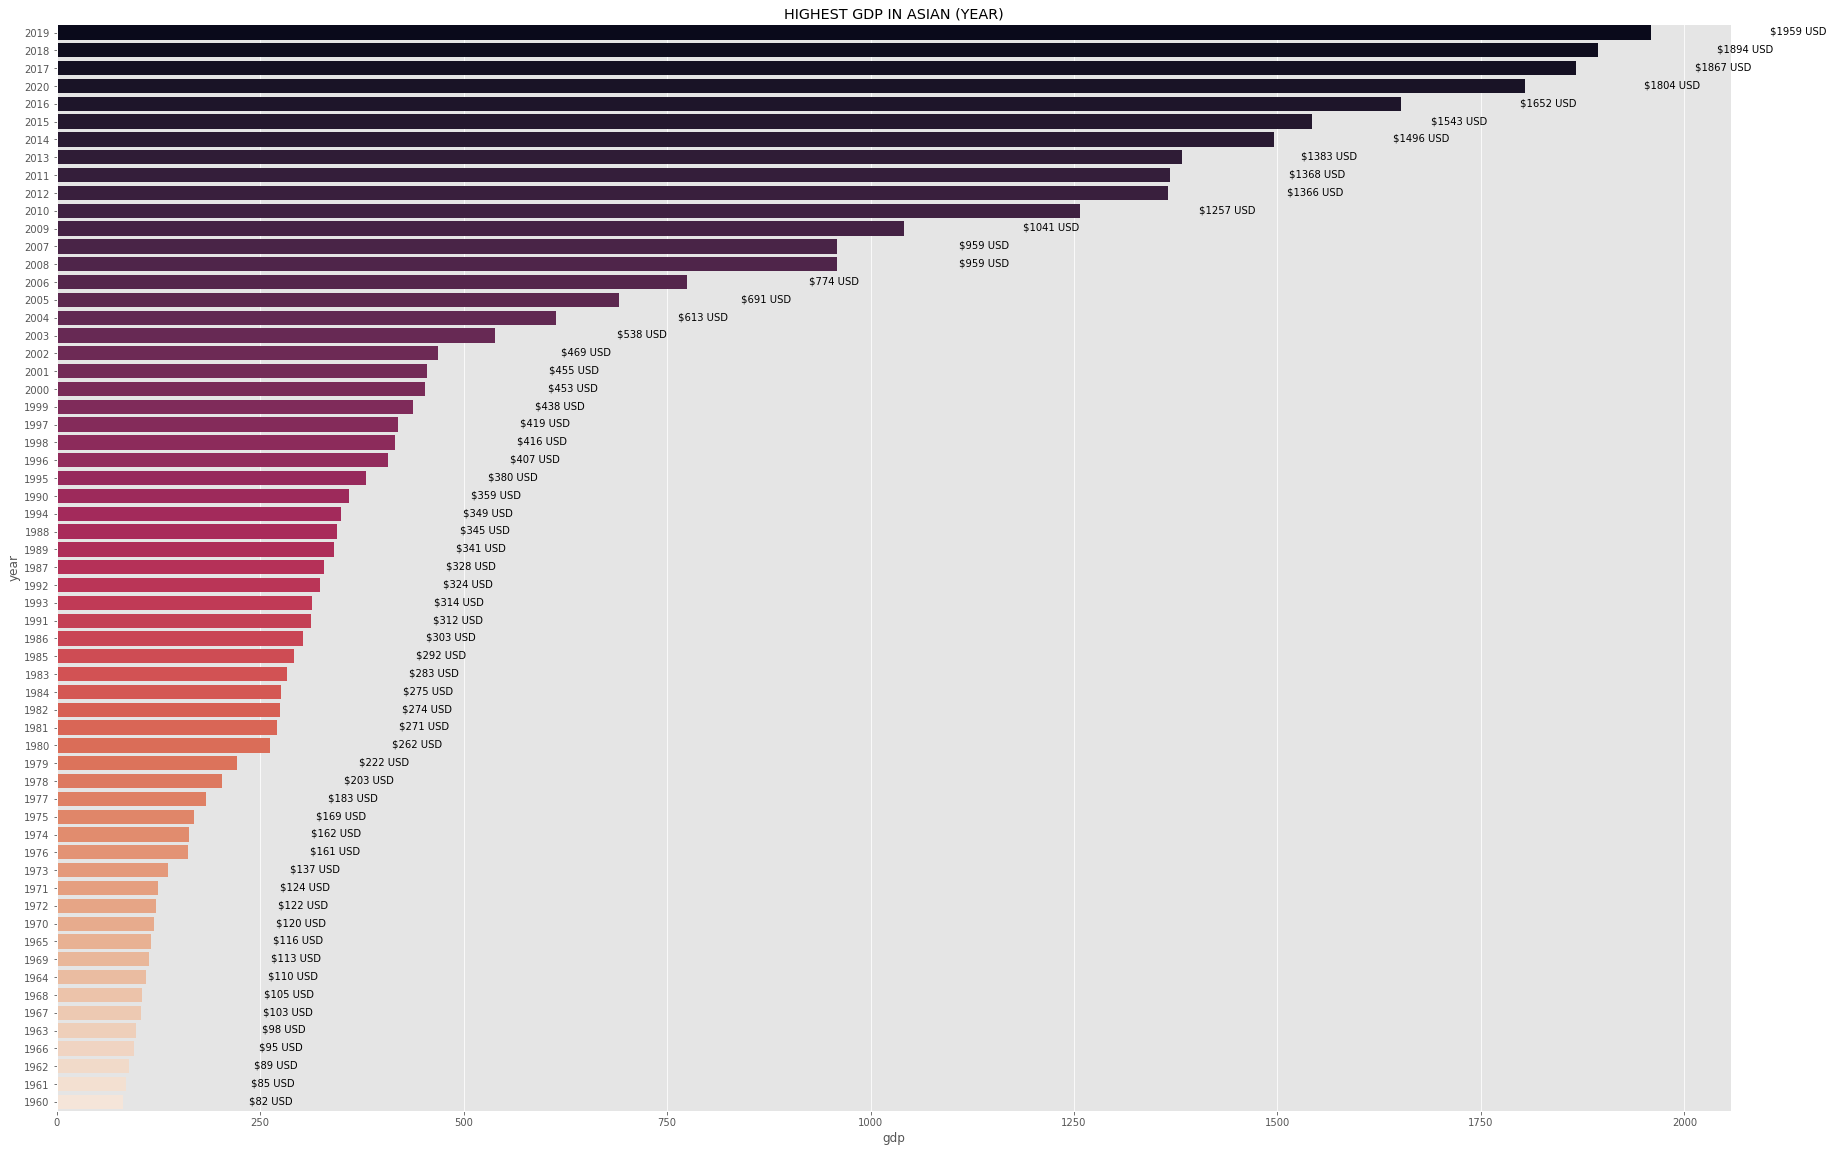

In [37]:
#GDP
import seaborn as sns
asian_gdp[['gdp','growth_rate']] = asian_gdp[['gdp','growth_rate']].apply(np.int64)
urut_gdp = asian_gdp.sort_values('gdp', ascending=False)
figure = plt.figure(figsize=(30,20))
ax = sns.barplot(palette="rocket",y="year", x="gdp", data = urut_gdp)
plt.title('HIGHEST GDP IN ASIAN (YEAR)')
for bar, label in zip(ax.patches, urut_gdp['gdp']):
    x = bar.get_y()
    width = bar.get_width()
    height = bar.get_height()
    label = f'${label} USD'
    ax.text(height+width+180,x+0.5, label, ha="center") 

# East Asia & pasific

In [38]:
# Asean trend from 1960 to 2019
eastasia_trend = pd.melt(world,id_vars='country',value_vars=asia.columns[1:])
eastasia_trend.columns = ['country','year','gdp']
asian_gdp = eastasia_trend[(eastasia_trend['country'] == 'East Asia & Pacific')].reset_index()[['year','gdp']]

avg_gdp_asia = asian_gdp.gdp
growth_rate = []
for i in range(60):
    growth_rate.append(round(((avg_gdp_asia[i+1]-avg_gdp_asia[i])/avg_gdp_asia[i])*100,3))
growth_rate.append(np.nan)
asian_gdp['growth_rate'] = growth_rate

In [39]:
def create_fig(graph_obj,title='',x_title='',y_title=''):
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig
def get_trend_plot(loc,country=False):
    asia = eastasia_trend[eastasia_trend['country'] == loc].reset_index()[['year','gdp']]
    gdp_series = asia.gdp
    growth_rate = []
    for i in range(60):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    asia['growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = asia.year,
    y = asia.gdp,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = asia.year,
    y = asia.growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'Gross Domestic Product (Growth in %)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'Gross Domestic Product Trend: ' + loc
    fig2_title = 'Gross Domestic Product Growth Rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','Gross Domestic Product in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','Gross Domestic Product Growth Rate in %')
    
    return fig1, fig2

In [40]:
gdpTrend,rateTrend = get_trend_plot('East Asia & Pacific')
iplot(gdpTrend)
iplot(rateTrend)

# Asian Rank

In [41]:
asian_Country = country_all.loc[(country_all['Country Name'] == 'Taiwan')|(country_all['Country Name'] == 'Turkey')|(country_all['Country Name'] == 'Myanmar')|(country_all['Country Name'] == 'East Timor')|(country_all['Country Name'] == 'Afghanistan')|(country_all['Country Name'] == 'Armenia')|(country_all['Country Name'] == 'Azerbaijan')|(country_all['Country Name'] == 'Bahrain')|(country_all['Country Name'] == 'Bangladesh')|(country_all['Country Name'] == 'Bhutan')|(country_all['Country Name'] == 'Brunei')|(country_all['Country Name'] == 'Burma')|(country_all['Country Name'] == 'Cambodia')|(country_all['Country Name'] == 'China')|(country_all['Country Name'] == 'Cyprus')|(country_all['Country Name'] == 'Georgia')|(country_all['Country Name'] == 'India')|(country_all['Country Name'] == 'Indonesia')|(country_all['Country Name'] == 'Iran')|(country_all['Country Name'] == 'Iraq')|(country_all['Country Name'] == 'Israel')|(country_all['Country Name'] == 'Japan')|(country_all['Country Name'] == 'Jordan')|(country_all['Country Name'] == 'Kazakhstan')|(country_all['Country Name'] == 'Kuwait')|(country_all['Country Name'] == 'Kyrgyzstan')|(country_all['Country Name'] == 'Laos')|(country_all['Country Name'] == 'Lebanon')|(country_all['Country Name'] == 'Malaysia')|(country_all['Country Name'] == 'Maldives')|(country_all['Country Name'] == 'Mongolia')|(country_all['Country Name'] == 'Nepal')|(country_all['Country Name'] == 'North Korea')|(country_all['Country Name'] == 'Oman')|(country_all['Country Name'] == 'Pakistan')|(country_all['Country Name'] == 'Palestine')|(country_all['Country Name'] == 'Philippines')|(country_all['Country Name'] == 'Qatar')|(country_all['Country Name'] == 'Saudi Arabia')|(country_all['Country Name'] == 'Singapore')|(country_all['Country Name'] == 'South Korea')|(country_all['Country Name'] == 'Sri Lanka')|(country_all['Country Name'] == 'Syria')|(country_all['Country Name'] == 'Tajikistan')|(country_all['Country Name'] == 'Thailand')|(country_all['Country Name'] == 'Turkmenistan')|(country_all['Country Name'] == 'United Arab Emirates')|(country_all['Country Name'] == 'Uzbekistan')|(country_all['Country Name'] == 'Vietnam')|(country_all['Country Name'] == 'Yemen')]
display(asian_Country)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
8,United Arab Emirates,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26848.088176,30117.948933,33823.181661,28457.078034,33512.633424,42764.540556,44987.537990,40025.822624,34843.159626,32309.832713,29720.897718,23467.879318,23726.307049,22295.118706,24028.262498,27729.390593,26612.253110,26420.859883,25596.739390,25848.016250,27221.934412,28975.079957,29512.674792,26899.601766,28470.885858,33291.366254,31280.755865,31567.546307,33499.102776,36333.187333,39365.459641,41907.421470,41809.462163,44498.940507,32024.197782,33893.263873,39194.672240,40976.490746,42412.639500,43751.805648,38663.400503,38141.867131,40644.791190,43839.324487,43103.336293,0.000000
10,Armenia,ARM,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,637.855921,590.505876,369.707232,357.202849,400.515594,456.374933,504.059843,523.284411,609.171654,597.432899,622.740923,694.423455,783.241215,930.125473,1191.921006,1643.756889,2158.148074,3139.280710,4010.861381,2994.340471,3218.378299,3525.807198,3681.844691,3838.173880,3986.231624,3607.289299,3591.828052,3914.527854,4220.540321,4622.738182,4267.452119
15,Azerbaijan,AZE,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.458623,209.472982,157.076754,314.555087,409.163189,505.500349,561.906808,573.916512,655.119945,703.683843,763.080638,883.733971,1045.009379,1578.402390,2473.081819,3851.437869,5574.603802,4950.294791,5843.533768,7189.691229,7496.294648,7875.756953,7891.313147,5500.310382,3880.738731,4147.089716,4739.841710,4805.753718,4214.311336
20,Bangladesh,BGD,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,100.122130,101.901413,100.221104,106.646644,112.665365,122.870628,122.847598,135.147381,140.002705,133.551419,94.381677,119.559724,182.020018,277.570605,141.197159,131.373227,176.033947,200.769677,227.751927,247.649617,220.718797,204.417690,213.996639,245.453912,233.658072,253.974474,270.699601,285.829217,306.268701,293.160421,293.644988,300.555748,299.533037,329.424076,394.717492,401.498667,407.429176,409.543184,418.068942,415.034404,413.080283,446.310676,475.291930,499.461940,509.640190,558.051841,634.987070,702.264420,781.153578,861.762162,883.117130,981.860851,1118.873808,1248.453310,1401.564635,1563.767819,1698.132081,1855.691510,1968.792225
22,Bahrain,BHR,GDP per capita (current US$),N

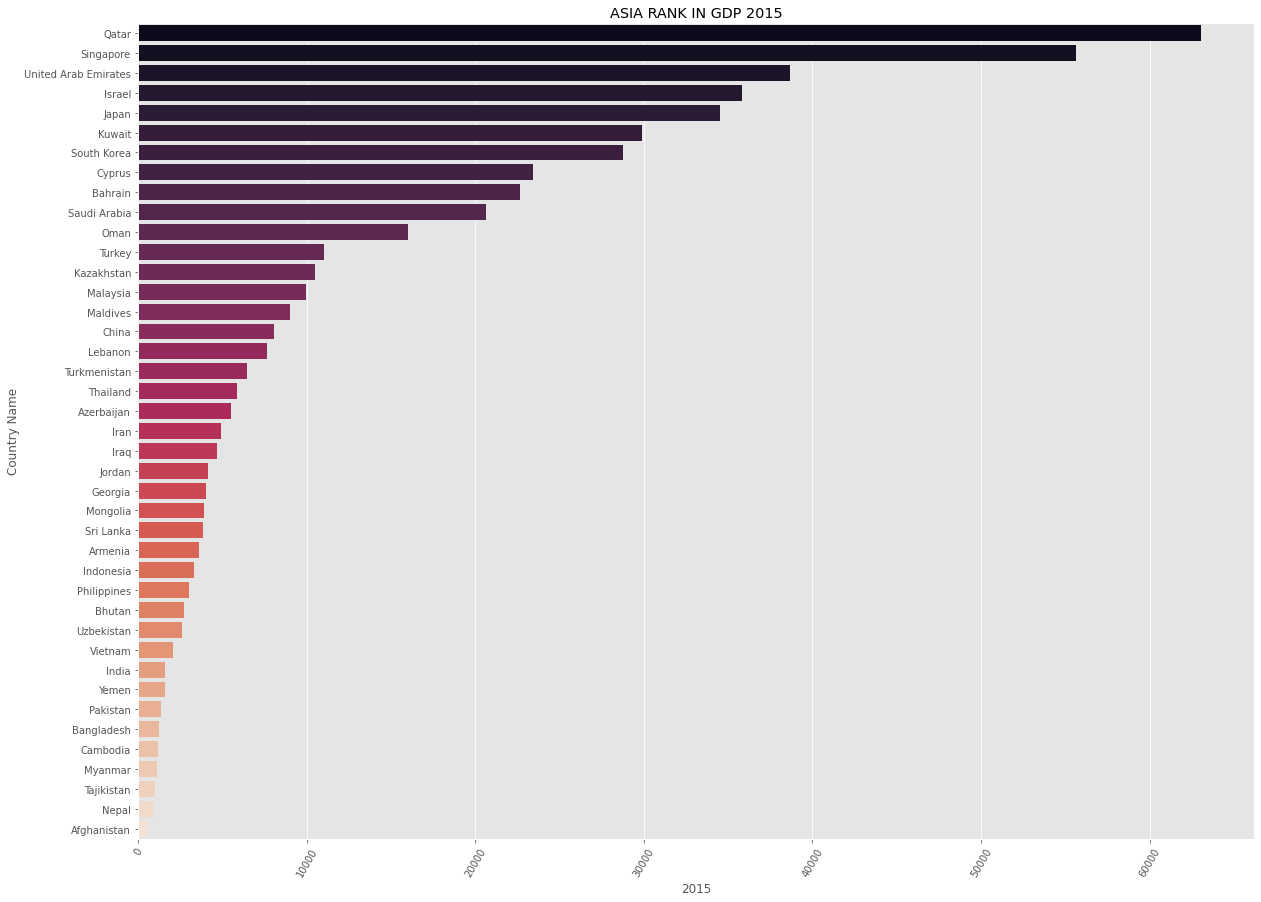

In [42]:
plt.figure(figsize=(20, 15))
gdp_2019 = asian_Country[['Country Name','2015']].sort_values(by='2015', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN GDP 2015")
sns.barplot(x='2015', y='Country Name', data=gdp_2019.head(50),palette='rocket')

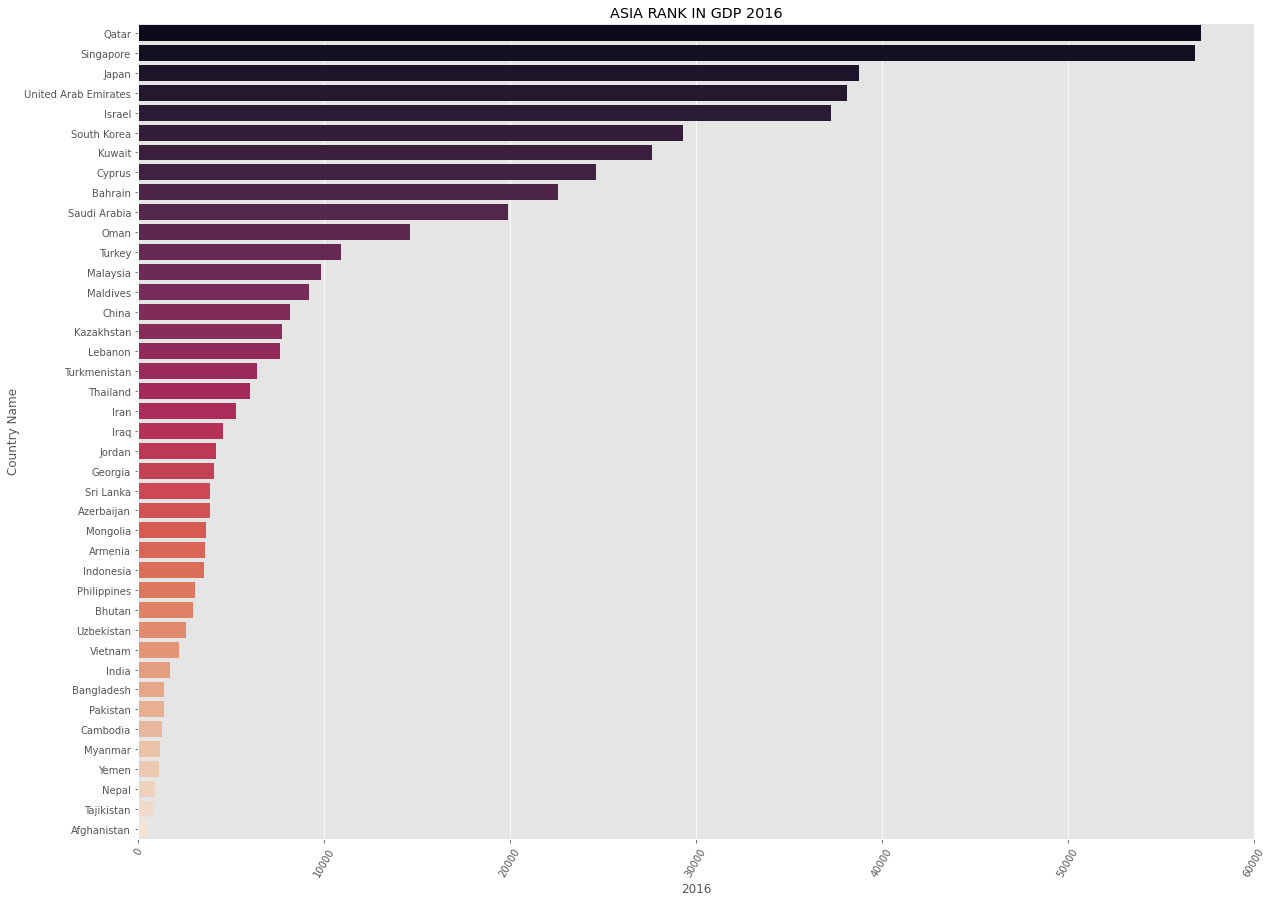

In [43]:
plt.figure(figsize=(20, 15))
gdp_2019 = asian_Country[['Country Name','2016']].sort_values(by='2016', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN GDP 2016")
sns.barplot(x='2016', y='Country Name', data=gdp_2019.head(50),palette='rocket')

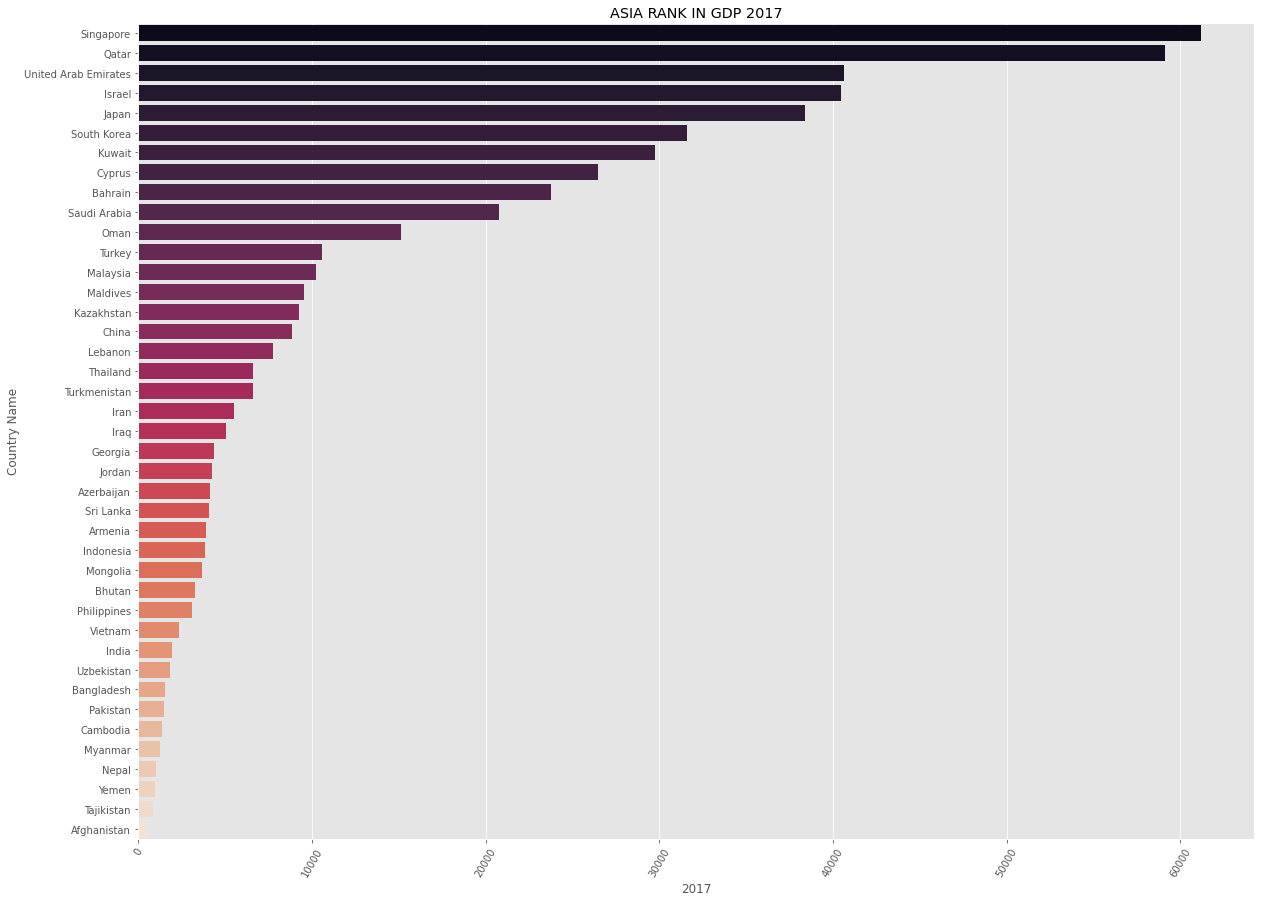

In [44]:
plt.figure(figsize=(20, 15))
gdp_2019 = asian_Country[['Country Name','2017']].sort_values(by='2017', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN GDP 2017")
sns.barplot(x='2017', y='Country Name', data=gdp_2019.head(50),palette='rocket')

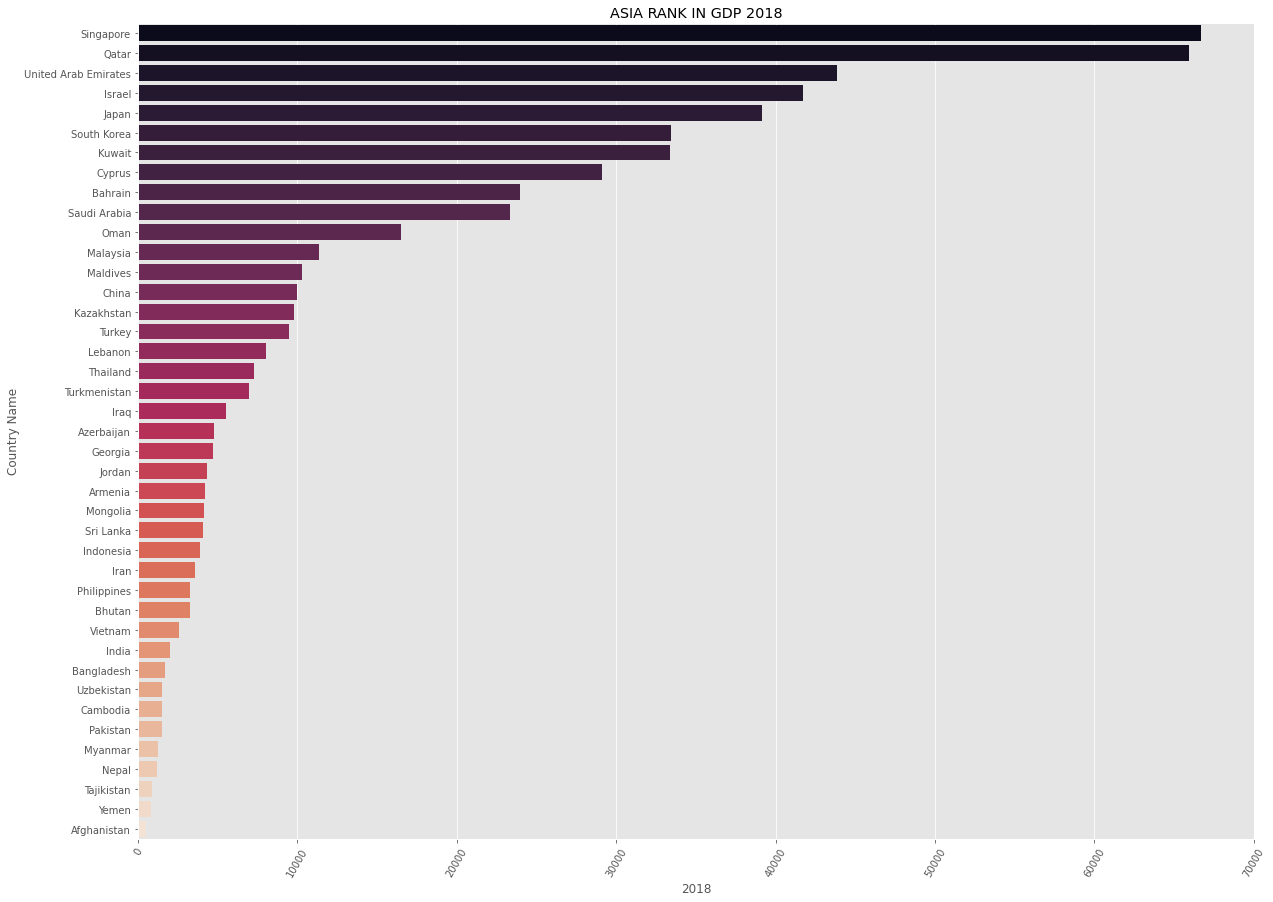

In [45]:
plt.figure(figsize=(20, 15))
gdp_2019 = asian_Country[['Country Name','2018']].sort_values(by='2018', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN GDP 2018")
sns.barplot(x='2018', y='Country Name', data=gdp_2019.head(50),palette='rocket')

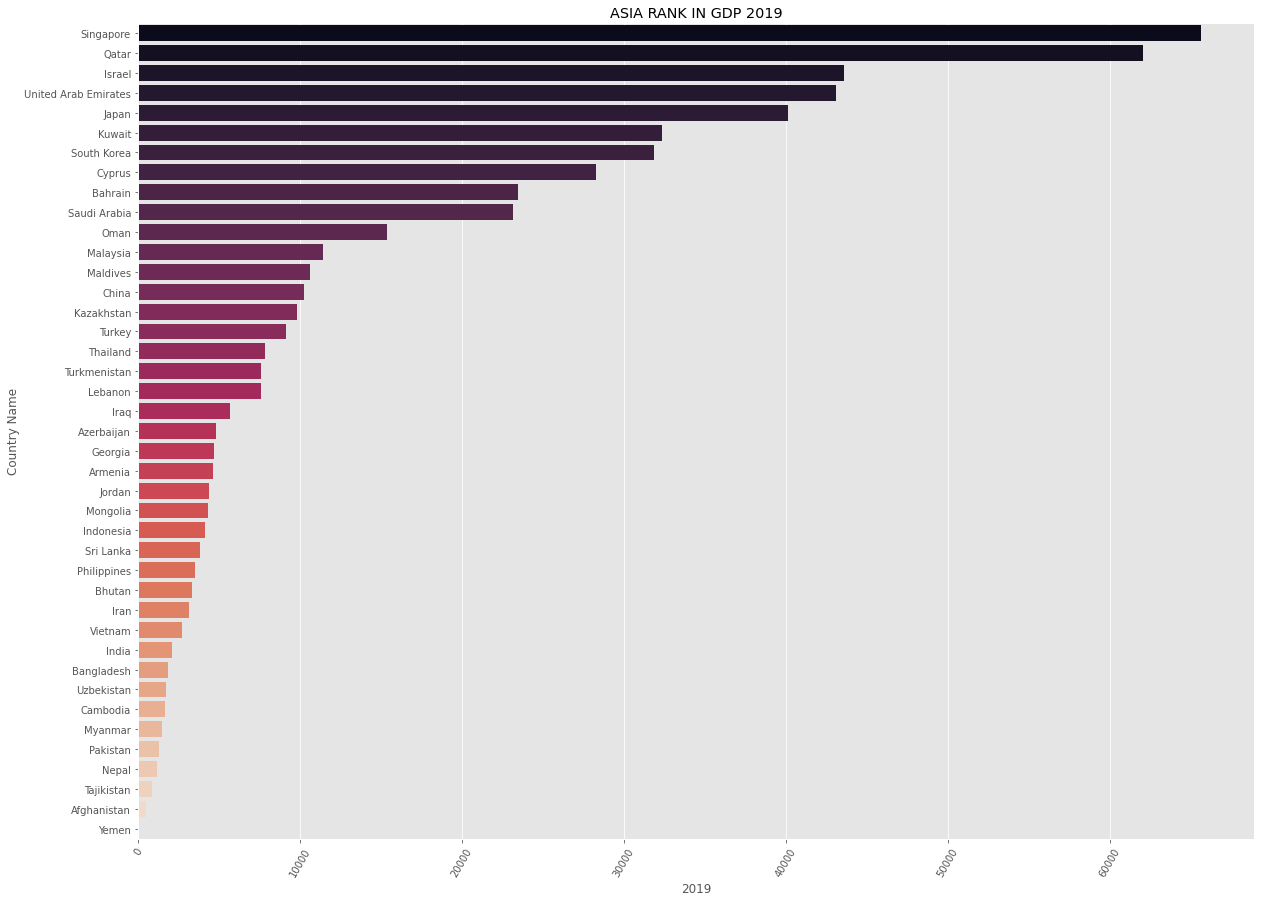

In [46]:
plt.figure(figsize=(20, 15))
gdp_2019 = asian_Country[['Country Name','2019']].sort_values(by='2019', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN GDP 2019")
sns.barplot(x='2019', y='Country Name', data=gdp_2019.head(50),palette='rocket')

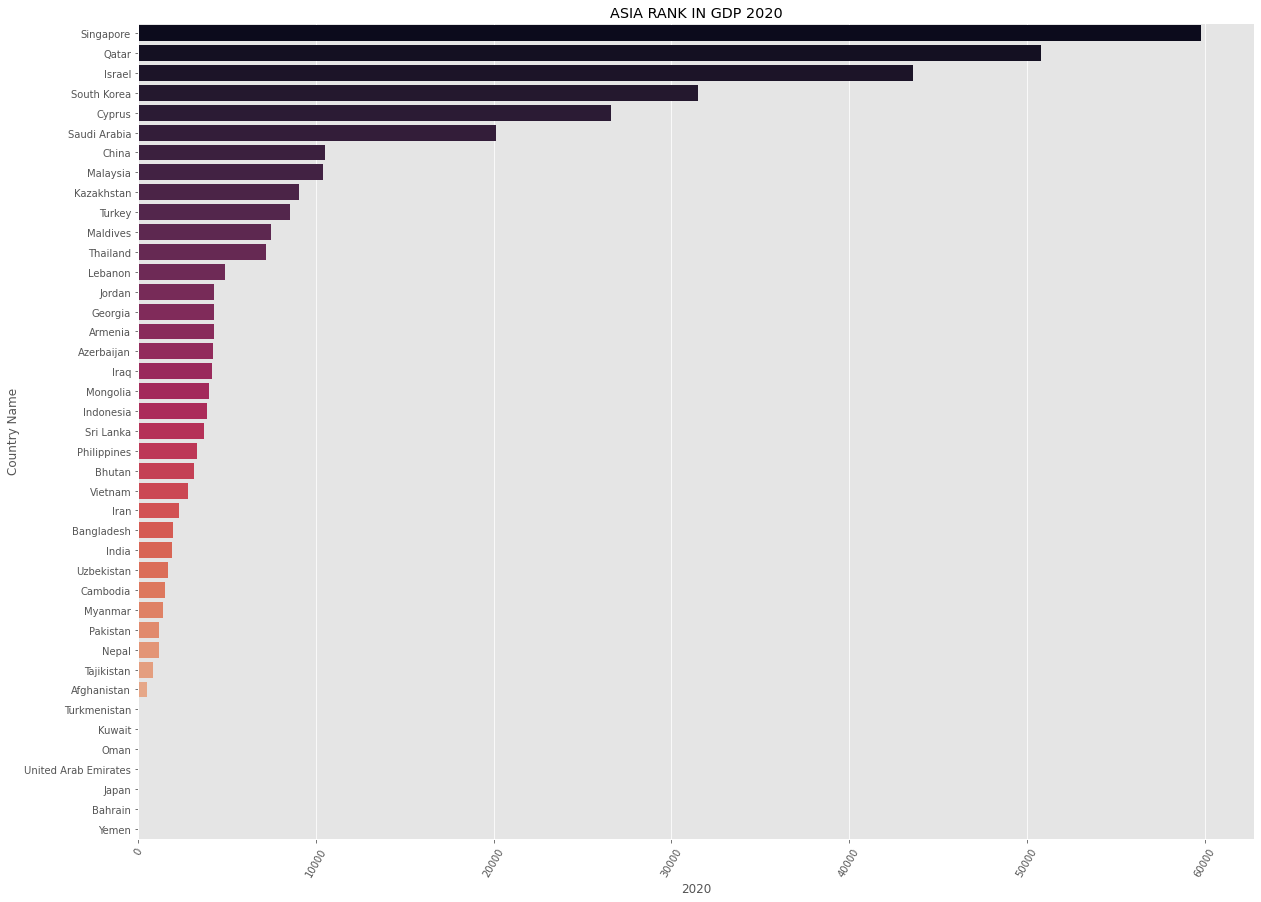

In [47]:
plt.figure(figsize=(20, 15))
gdp_2019 = asian_Country[['Country Name','2020']].sort_values(by='2020', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN GDP 2020")
sns.barplot(x='2020', y='Country Name', data=gdp_2019.head(50),palette='rocket')

In [48]:
fig = ply.choropleth(asian_Country, locations="Country Name", locationmode='country names', color='2020',height=700,
                    hover_name="2020", hover_data=['2020'],
                    title='GDP 2020 over asia Countries', template='plotly_dark', color_continuous_scale='haline',scope="asia")
fig.show()

# Asean Rank

In [49]:
asean_Country = country_all.loc[(country_all['Country Name'] == 'Myanmar')|(country_all['Country Name'] == 'East Timor')|(country_all['Country Name'] == 'Brunei Darussalam')|(country_all['Country Name'] == 'Cambodia')|(country_all['Country Name'] == 'Indonesia')|(country_all['Country Name'] == 'Laos')|(country_all['Country Name'] == 'Malaysia')|(country_all['Country Name'] == 'Philippines')|(country_all['Country Name'] == 'Singapore')|(country_all['Country Name'] == 'Thailand')|(country_all['Country Name'] == 'Vietnam')]
display(asean_Country)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
31,Brunei Darussalam,BRN,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,1113.783042,1237.563579,1236.419664,1364.065978,1304.340672,1382.537631,1455.887576,1906.971488,2916.130273,6923.221828,7228.040373,8461.889582,9917.301470,10715.176537,14945.841092,25422.039189,21828.122451,20693.824911,18129.243904,17337.026476,15699.574778,10214.028491,11594.567541,11009.257385,11872.725166,13607.890273,13905.168337,15274.667708,14575.574586,14120.952558,15933.452828,16793.391231,16660.147627,12694.148957,14101.172850,18012.502195,16472.003295,16850.394079,18560.503502,21902.027118,26105.422029,30979.962843,32663.392371,37934.676448,27956.005143,35270.642139,47055.960643,47739.557693,44740.859424,41725.867522,31164.036253,27158.405654,28571.608291,31628.476257,31085.961886,27466.339641
105,Indonesia,IDN,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.537296,65.053044,74.602096,79.714535,79.178188,90.876171,131.024905,202.495405,233.116661,278.196670,333.694377,365.915842,356.921339,491.579533,566.577718,583.669835,512.959111,525.333943,516.960990,474.859160,442.215485,481.781485,530.003255,585.076563,631.782858,681.938386,827.905266,912.203294,1026.393436,1137.410101,1063.712376,463.948158,671.098610,780.190205,748.257609,900.177588,1065.648520,1150.261367,1263.287332,1589.801489,1860.002811,2166.854231,2261.247309,3122.362673,3643.047176,3694.359340,3623.927241,3491.637491,3331.695115,3562.816334,3837.578024,3893.859578,4135.201531,3869.588427
122,Cambodia,KHM,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,109.481170,117.823450,123.645925,134.304280,138.842975,144.011778,157.190139,142.265204,102.678961,135.848785,69.233299,94.358594,78.112035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,254.116635,270.542940,322.931575,319.286314,304.764769,268.990372,295.903178,300.613679,321.150224,338.987477,362.335482,408.513639,474.111192,539.750329,631.525258,745.609127,738.054731,785.502667,882.275614,950.880346,1013.420536,1093.495976,1162.904995,1269.591499,1385.260066,1512.126989,1643.121389,1512.727753
159,Myanmar,MMR,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165.453277,99.744920,90.532429,159.957278,186.540068,182.384410,216.002603,295.638359,512.580086,637.521739,840.074439,1018.131730,1061.923411,1035.804240,1121.942049,1140.766520,1144.474341,1158.434566,1257.803576,1279.089756,1477.355368,1400.218242
168,Malaysia,MYS,GDP per capita (current US$),NY.GDP.PCAP.CD,234.938897,225.933594,230.260594,279.717541,289.009228,310.327926,321.094160,317.424210,323.402487,347.373094,357.656799,383.671472,445.350158,661.022691,799.931979,764.566379,886.230043,1027.292911,1246.558309,1576.048806,1774.740297,1769.099402,1852.256484,2047.770288,2234.257204,2000.148286,1728.684805,1947.808238,2072.077686,2216.250446,2441.741991,2653.526169,3113.645677,3433.162787,3728.110481,4329.707998,4798.611770,4637.865661,3263.334883,3492.670125,4043.662923,3913.429386,4165.726104,4461.847325,4952.213958,5587.024780,6209.126167,7243.456801,8474.587762,7292.494973,9040.568495,10399.370213,10817.431710,10970.104300,11319.061945,9955.242

In [50]:
asean_trend = pd.melt(asean_Country,id_vars='Country Name',value_vars=country_all.columns[1:])
asean_trend.columns = ['Country Name','year','gdp']
asean_gdp = asean_trend.reset_index()[['Country Name','year','gdp']]
asean_gdp

,Country Name,year,gdp
0,Brunei Darussalam,Country Code,BRN
1,Indonesia,Country Code,IDN
2,Cambodia,Country Code,KHM
3,Myanmar,Country Code,MMR
4,Malaysia,Country Code,MYS
...,...,...,...
571,Malaysia,2020,10401.8
572,Philippines,2020,3298.83
573,Singapore,2020,59797.8
574,Thailand,2020,7189.04


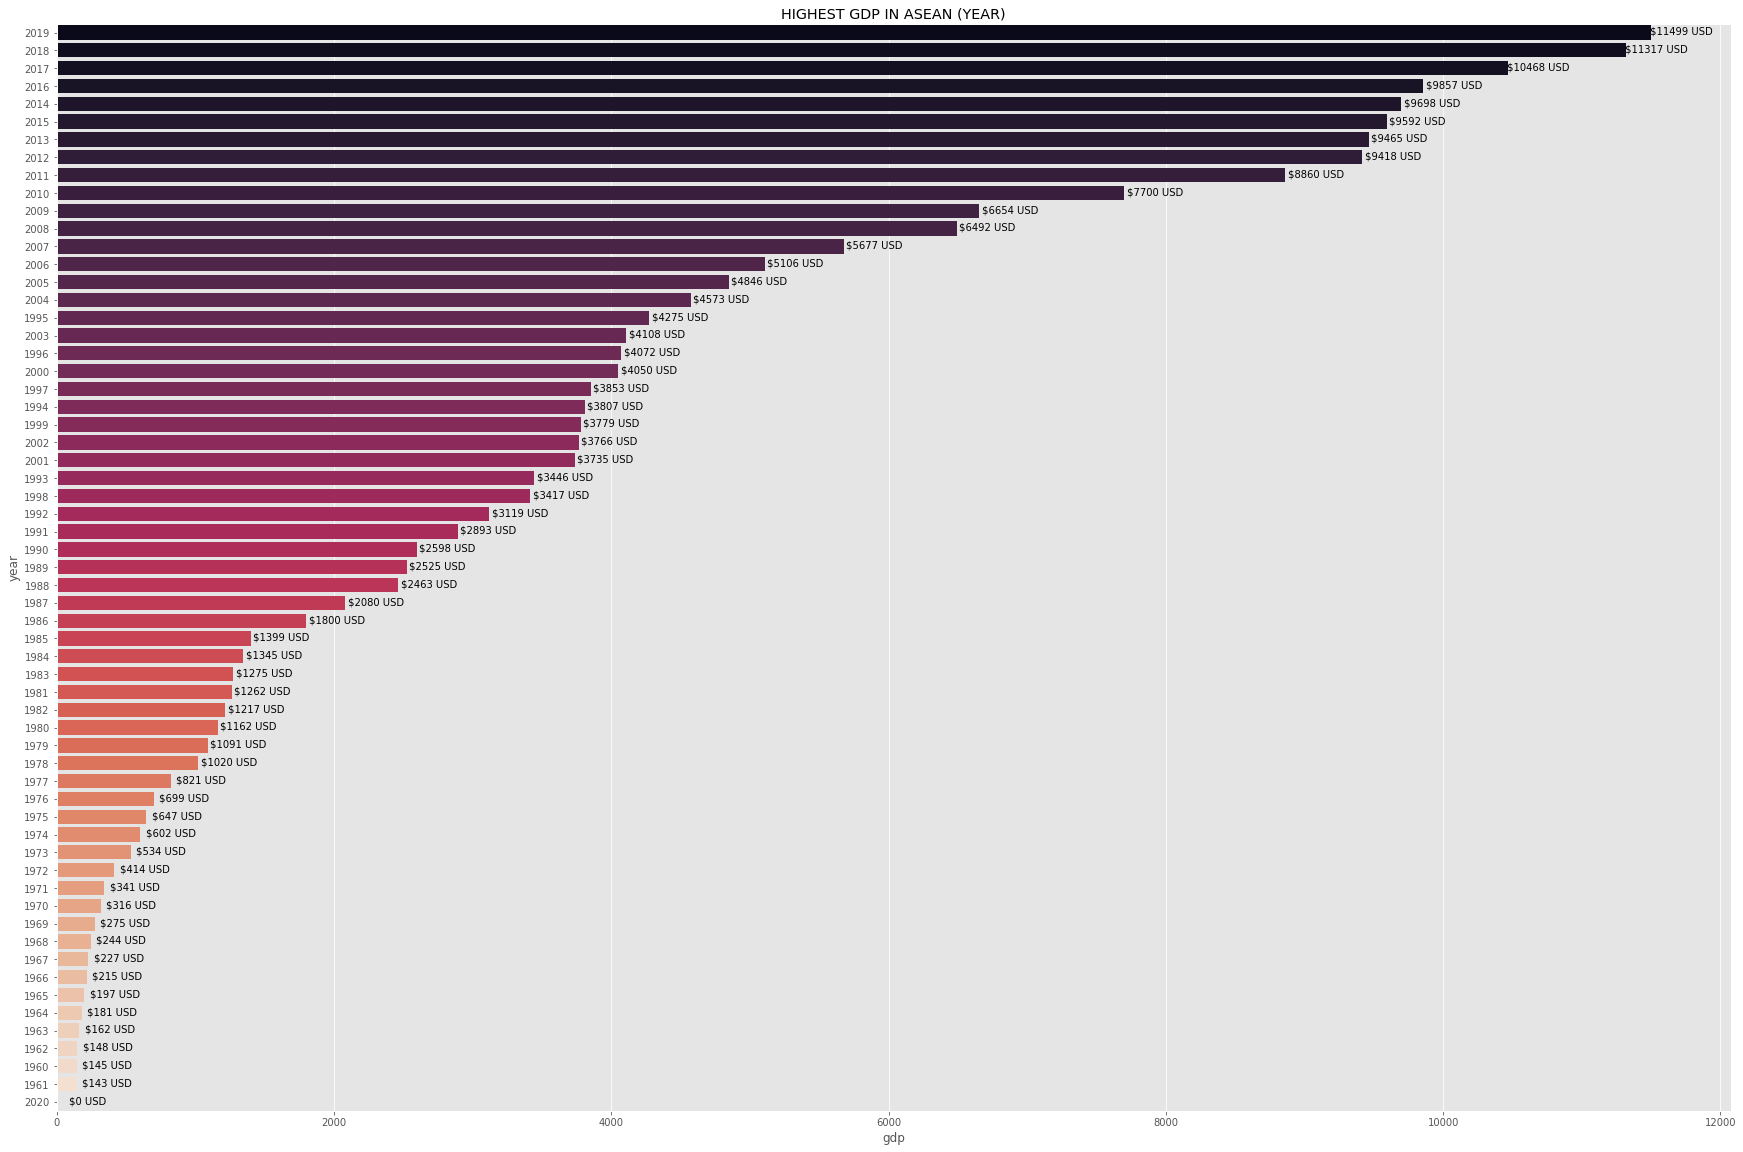

In [51]:
#GDP
import seaborn as sns
urut_gdp = asian_gdp.sort_values('gdp', ascending=False)
urut_gdp[['gdp','growth_rate']] = urut_gdp[['gdp','growth_rate']].apply(np.int64)
figure = plt.figure(figsize=(30,20))
ax = sns.barplot(palette="rocket",y="year", x="gdp", data = urut_gdp)
plt.title('HIGHEST GDP IN ASEAN (YEAR)')
for bar, label in zip(ax.patches, urut_gdp['gdp']):
    x = bar.get_y()
    width = bar.get_width()
    height = bar.get_height()
    label = f'${label} USD'
    ax.text(height+width+220,x+0.5, label, ha="center") 

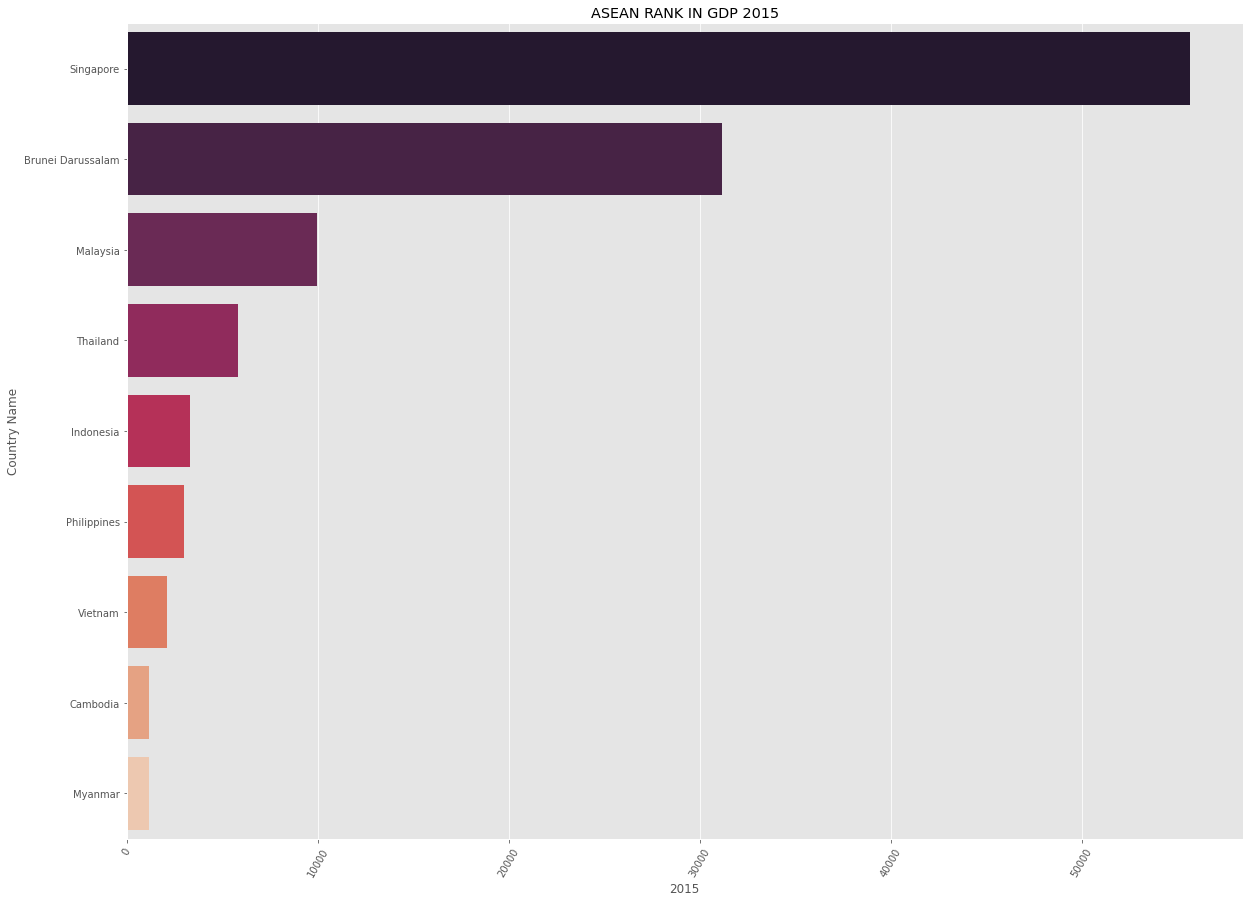

In [52]:
plt.figure(figsize=(20, 15))
gdp_2019 = asean_Country[['Country Name','2015']].sort_values(by='2015', ascending=False)
plt.xticks(rotation=60)
plt.title("ASEAN RANK IN GDP 2015")
sns.barplot(x='2015', y='Country Name', data=gdp_2019.head(50),palette='rocket')

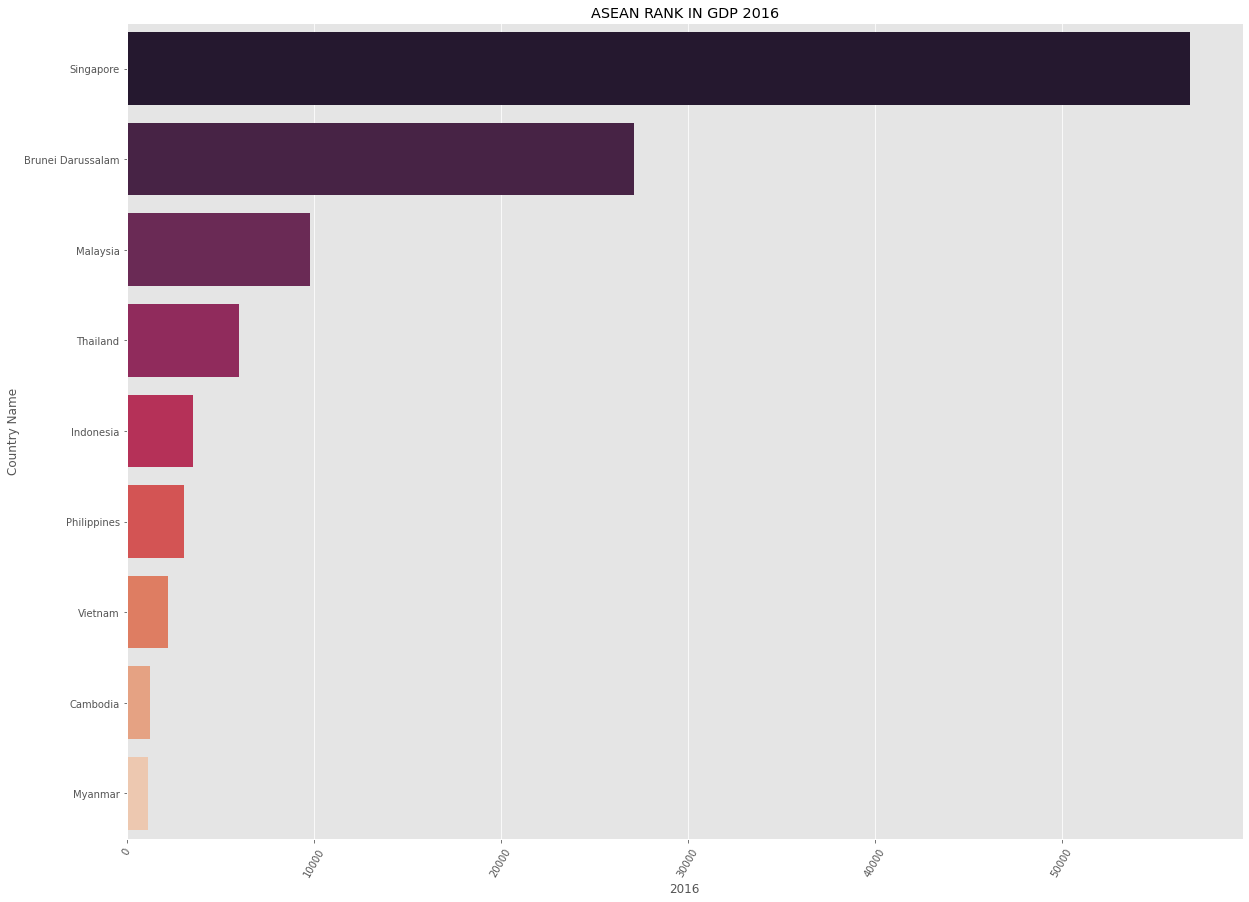

In [53]:
plt.figure(figsize=(20, 15))
gdp_2019 = asean_Country[['Country Name','2016']].sort_values(by='2016', ascending=False)
plt.xticks(rotation=60)
plt.title("ASEAN RANK IN GDP 2016")
sns.barplot(x='2016', y='Country Name', data=gdp_2019.head(50),palette='rocket')

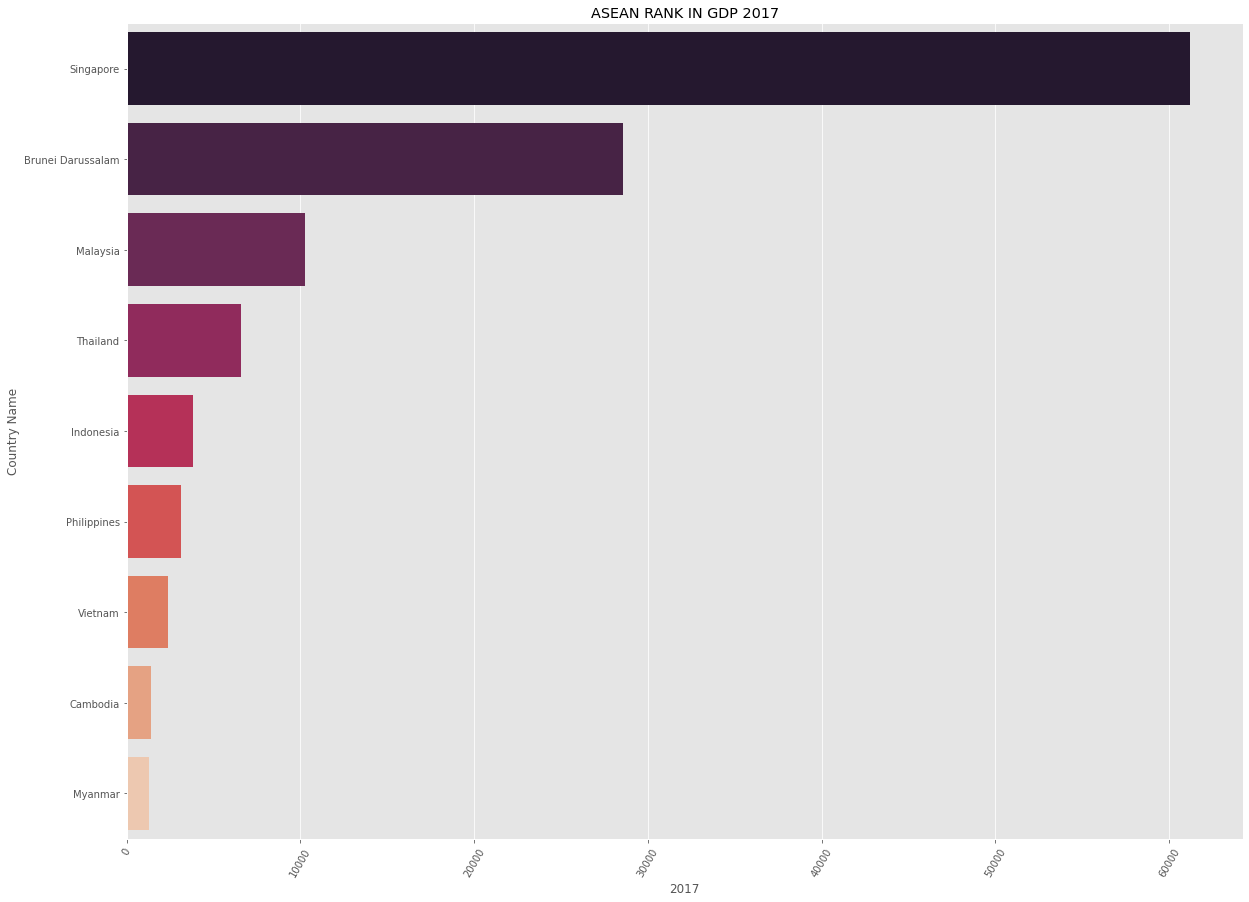

In [54]:
plt.figure(figsize=(20, 15))
gdp_2019 = asean_Country[['Country Name','2017']].sort_values(by='2017', ascending=False)
plt.xticks(rotation=60)
plt.title("ASEAN RANK IN GDP 2017")
sns.barplot(x='2017', y='Country Name', data=gdp_2019.head(50),palette='rocket')

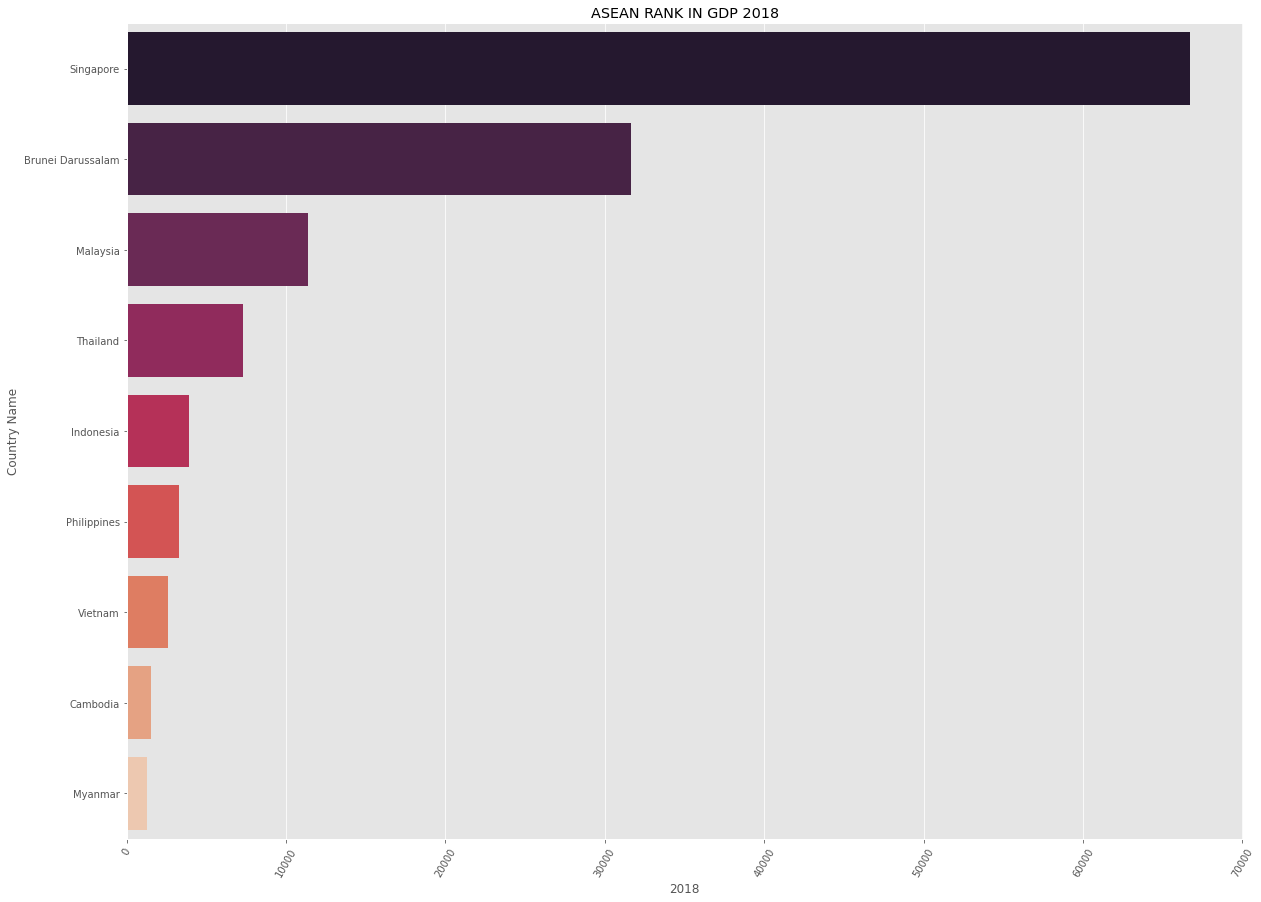

In [55]:
plt.figure(figsize=(20, 15))
gdp_2019 = asean_Country[['Country Name','2018']].sort_values(by='2018', ascending=False)
plt.xticks(rotation=60)
plt.title("ASEAN RANK IN GDP 2018")
sns.barplot(x='2018', y='Country Name', data=gdp_2019.head(50),palette='rocket')

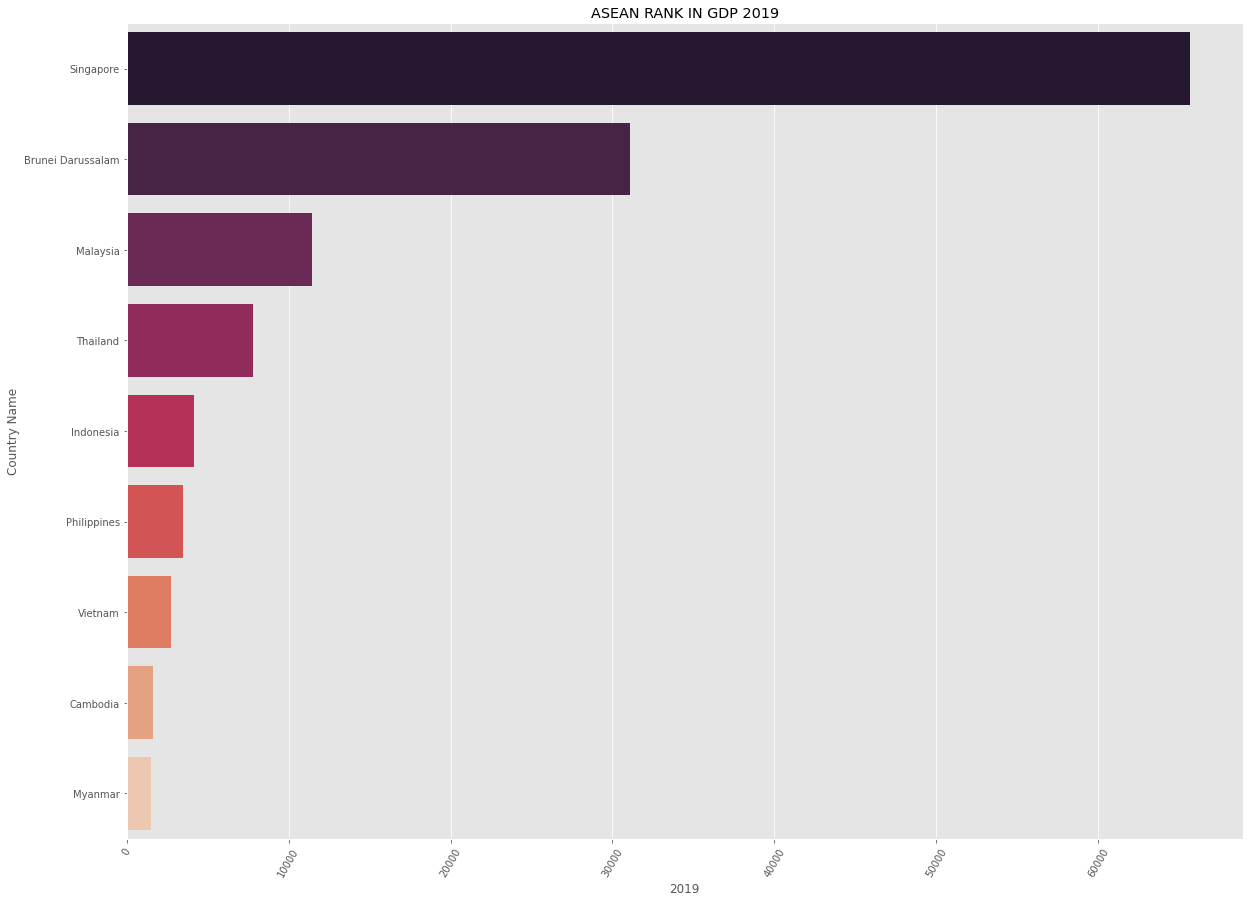

In [56]:
plt.figure(figsize=(20, 15))
gdp_2019 = asean_Country[['Country Name','2019']].sort_values(by='2019', ascending=False)
plt.xticks(rotation=60)
plt.title("ASEAN RANK IN GDP 2019")
sns.barplot(x='2019', y='Country Name', data=gdp_2019.head(50),palette='rocket')

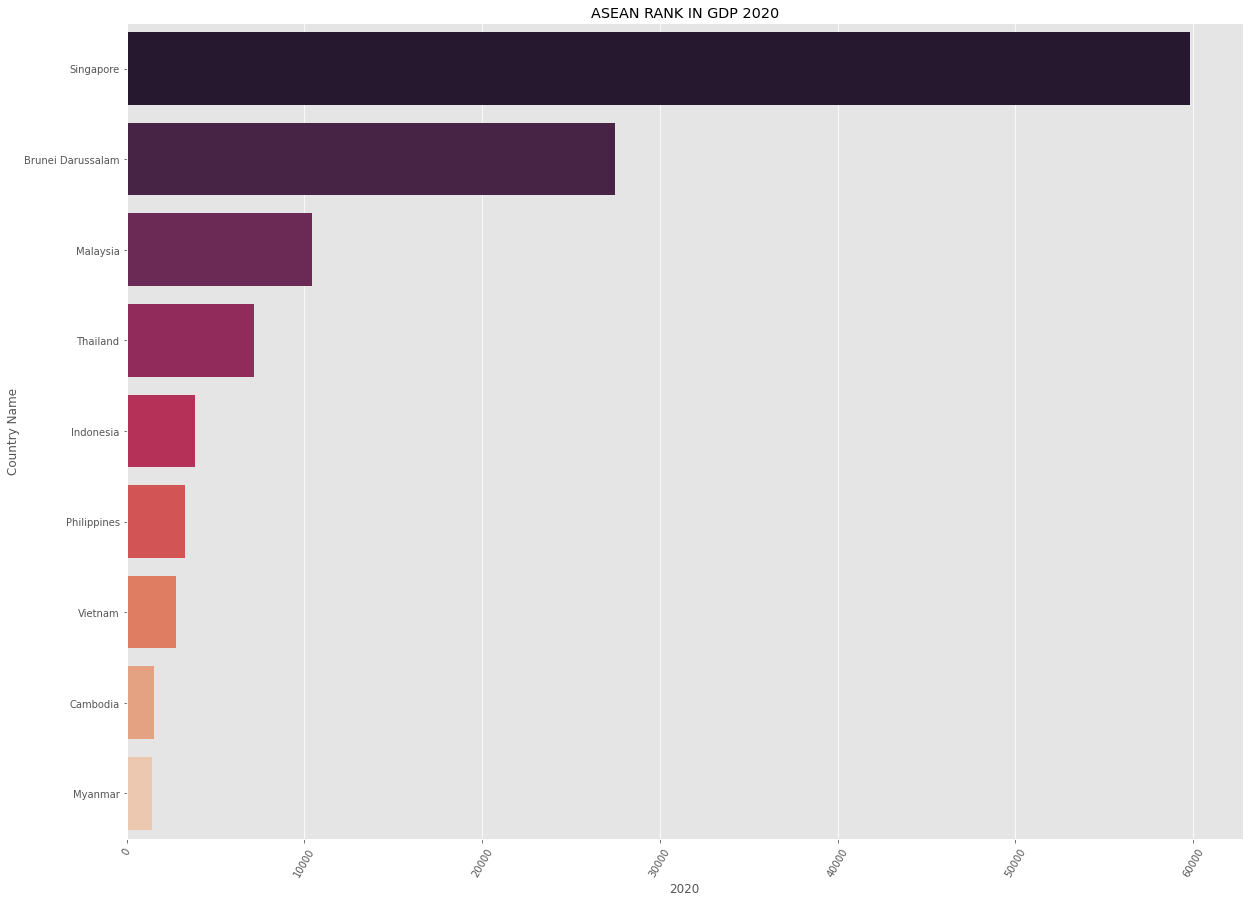

In [57]:
plt.figure(figsize=(20, 15))
gdp_2019 = asean_Country[['Country Name','2020']].sort_values(by='2020', ascending=False)
plt.xticks(rotation=60)
plt.title("ASEAN RANK IN GDP 2020")
sns.barplot(x='2020', y='Country Name', data=gdp_2019.head(50),palette='rocket')

In [58]:
fig = ply.choropleth(asean_Country, locations="Country Name", locationmode='country names', color='2020',height=700,
                    hover_name="2020", hover_data=['2020'],
                    title='GDP 2020 over Asean Countries', template='plotly_dark', color_continuous_scale='haline',scope="asia")
fig.show()

# Indonesia

In [59]:
country_all

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230436,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
6,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3238.690261,3496.532023,4218.271599,5342.168560,6320.809632,7169.101006,7151.249909,7751.843307,9127.812280,11818.473343,12378.784511,10372.786050,9610.020616,8025.207641,7728.906695,7775.614217,10361.147765,12615.126177,14304.640595,15165.281255,18878.852313,19534.263630,20549.805575,16515.658395,16235.068038,18458.173993,19016.288188,18355.627860,18895.110661,19262.308991,21854.246803,22970.512213,25067.240064,32272.845891,37966.187252,40064.224929,42674.758968,47804.849934,48719.658770,43504.215652,40850.248143,43334.811413,38686.461264,39540.724814,41303.929371,35770.776704,37475.635059,38964.904478,41791.969837,40897.330873,0.000000
...,...,...,...,...,.

#20 Tahun pertama

In [60]:
#perkembangan tiap 20 tahun
indo_1960_1980 = country_all[['Country Name','1960',	'1961',	'1962',	'1963',	'1964',	'1965',	'1966',	'1967',	'1968',	'1969'	,	'1971',	'1972',	'1973',	'1974',	'1975',	'1976',	'1977',	'1978',	'1979',	'1980',	'1981',	'1982']]
indo_1960_1980 = indo_1960_1980.loc[(indo_1960_1980['Country Name']=="Indonesia")]

In [61]:
# Asian trend from 1960 to 2019
indo_trend = pd.melt(indo_1960_1980,id_vars='Country Name',value_vars=indo_1960_1980.columns[1:-2])
indo_trend.columns = ['Country Name','year','gdp']
indo_gdp = indo_trend[(indo_trend['Country Name'] == 'Indonesia')].reset_index()[['year','gdp']]

avg_gdp_indo = indo_gdp.gdp
growth_rate = []
for i in range(19):
    growth_rate.append(round(((avg_gdp_indo[i+1]-avg_gdp_indo[i])/avg_gdp_indo[i])*100,2))
growth_rate.append(np.nan)
indo_gdp['growth_rate'] = growth_rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in double_scalars



In [62]:
indo_trend

,Country Name,year,gdp
0,Indonesia,1960,0.000000
1,Indonesia,1961,0.000000
2,Indonesia,1962,0.000000
3,Indonesia,1963,0.000000
4,Indonesia,1964,0.000000
5,Indonesia,1965,0.000000
6,Indonesia,1966,0.000000
7,Indonesia,1967,53.537296
8,Indonesia,1968,65.053044
9,Indonesia,1969,74.602096


In [63]:
def create_fig(graph_obj,title='',x_title='',y_title=''):
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig
def get_trend_plot(loc,country=False):
    indo_1960_1980 = indo_trend[indo_trend['Country Name'] == loc].reset_index()[['year','gdp']]
    gdp_series = indo_trend.gdp
    growth_rate = []
    for i in range(19):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    indo_trend['growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = indo_trend.year,
    y = indo_trend.gdp,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = indo_trend.year,
    y = indo_trend.growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'Gross Domestic Product (Growth in %)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'Gross Domestic Product Trend: ' + loc
    fig2_title = 'Gross Domestic Product Growth Rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','Gross Domestic Product in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','Gross Domestic Product Growth Rate in %')
    
    return fig1, fig2

In [64]:
gdpTrend,rateTrend = get_trend_plot('Indonesia')
iplot(gdpTrend)
iplot(rateTrend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in double_scalars



Text(0, 0.5, 'Counts')

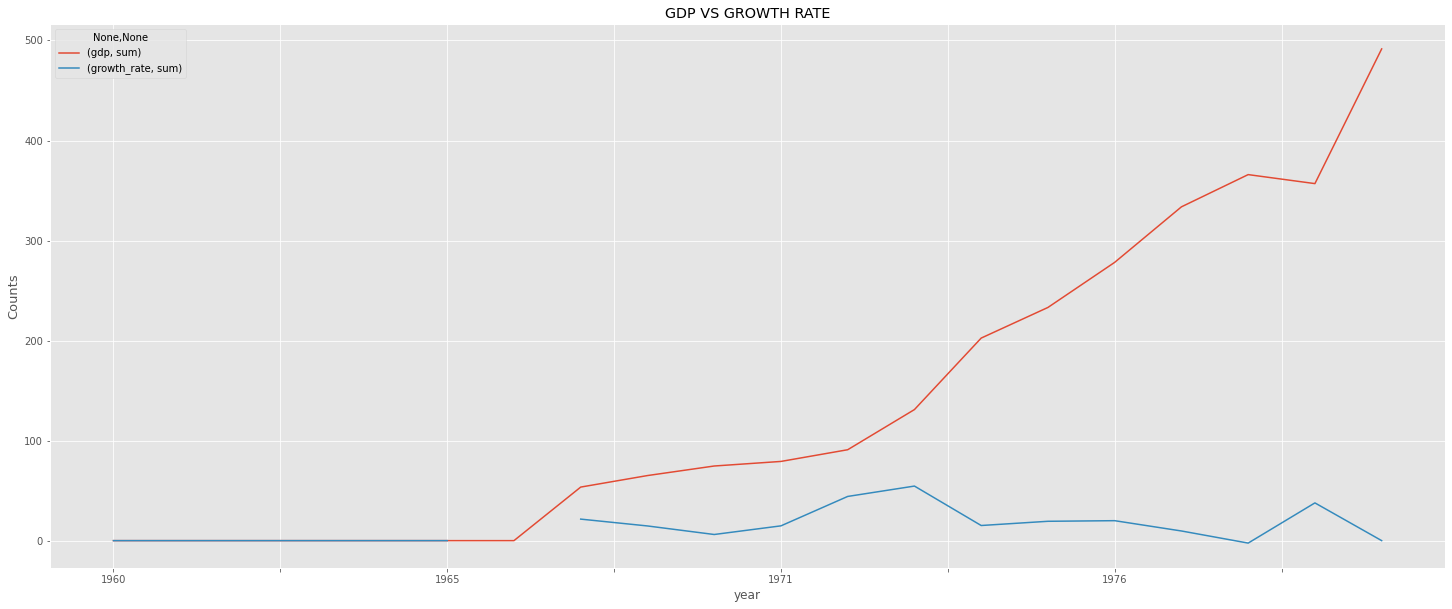

In [65]:
gdp= indo_trend[indo_trend['Country Name']=='Indonesia'].groupby(['year']).agg({'gdp':['sum']})
growth = indo_trend[indo_trend['Country Name']=='Indonesia'].groupby(['year']).agg({'growth_rate':['sum']})
total= gdp.join(growth)

plt.figure(figsize=(25,10))
total.plot(ax=plt.gca(), title='GDP VS GROWTH RATE')
plt.ylabel("Counts", size=13)

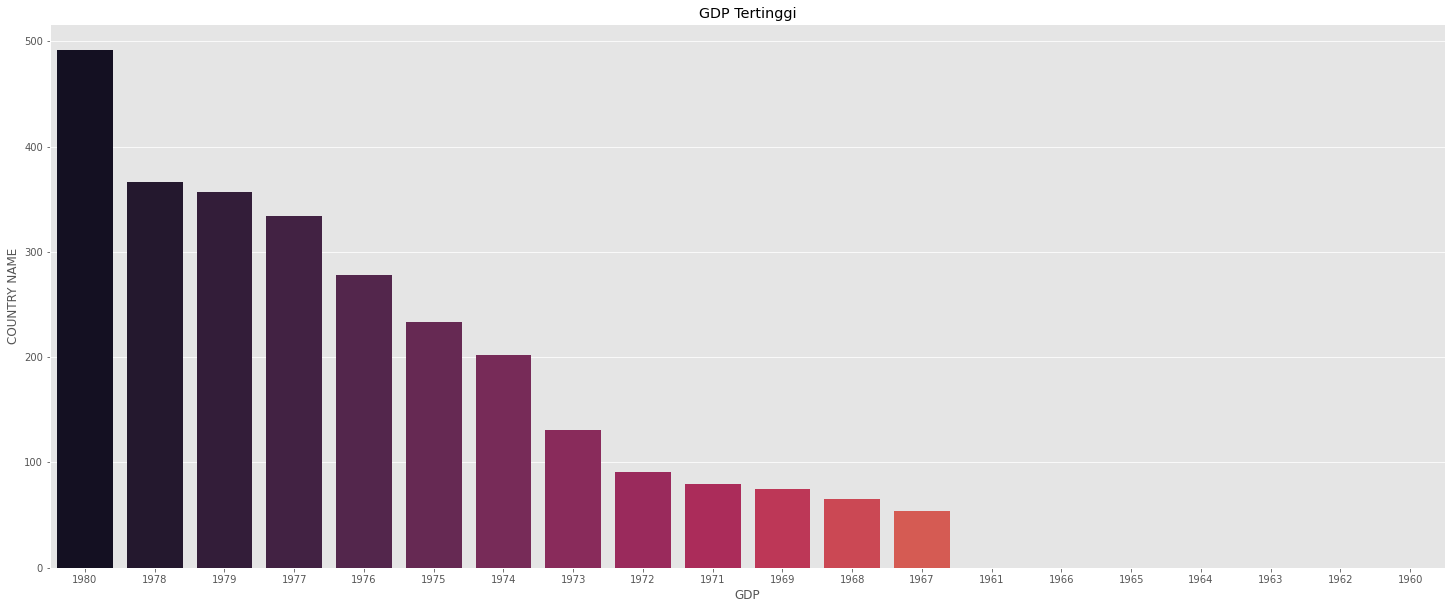

In [66]:
#GDP
import seaborn as sns
gdp = indo_trend.sort_values('gdp', ascending=False)
figure = plt.figure(figsize=(25,10))
sns.barplot(data=gdp ,y="gdp", x="year",  color='c',palette="rocket")
plt.xlabel('GDP')
plt.ylabel('COUNTRY NAME')
plt.title('GDP Tertinggi')
plt.show()

#20 Tahun kedua

In [67]:
#perkembangan tiap 20 tahun
indo_1980_2000 = country_all[['Country Name','1980',	'1981',	'1982',	'1983',	'1984',	'1985',	'1986',	'1987',	'1988',	'1989'	,	'1991',	'1992',	'1993',	'1994',	'1995',	'1996',	'1997',	'1998',	'1999',	'2000',	'2001',	'2002']]
indo_1980_2000 = indo_1980_2000.loc[(indo_1980_2000['Country Name']=="Indonesia")]

In [68]:
# Asian trend from 1960 to 2019
indo_trend2 = pd.melt(indo_1980_2000,id_vars='Country Name',value_vars=indo_1980_2000.columns[1:-2])
indo_trend2.columns = ['Country Name','year','gdp']
indo_gdp2 = indo_trend2[(indo_trend2['Country Name'] == 'Indonesia')].reset_index()[['year','gdp']]

avg_gdp_indo2 = indo_gdp2.gdp
growth_rate = []
for i in range(19):
    growth_rate.append(round(((avg_gdp_indo2[i+1]-avg_gdp_indo2[i])/avg_gdp_indo2[i])*100,3))
growth_rate.append(np.nan)
indo_gdp2['growth_rate'] = growth_rate

In [69]:
indo_trend2

,Country Name,year,gdp
0,Indonesia,1980,491.579533
1,Indonesia,1981,566.577718
2,Indonesia,1982,583.669835
3,Indonesia,1983,512.959111
4,Indonesia,1984,525.333943
5,Indonesia,1985,516.960990
6,Indonesia,1986,474.859160
7,Indonesia,1987,442.215485
8,Indonesia,1988,481.781485
9,Indonesia,1989,530.003255


In [70]:
def create_fig(graph_obj,title='',x_title='',y_title=''):
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig
def get_trend_plot(loc,country=False):
    indo_1980_2000 = indo_trend2[indo_trend2['Country Name'] == loc].reset_index()[['year','gdp']]
    gdp_series = indo_trend2.gdp
    growth_rate = []
    for i in range(19):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    indo_trend2['growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = indo_trend2.year,
    y = indo_trend2.gdp,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = indo_trend2.year,
    y = indo_trend2.growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'Gross Domestic Product (Growth in %)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'Gross Domestic Product Trend: ' + loc
    fig2_title = 'Gross Domestic Product Growth Rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','Gross Domestic Product in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','Gross Domestic Product Growth Rate in %')
    
    return fig1, fig2

In [71]:
gdpTrend,rateTrend = get_trend_plot('Indonesia')
iplot(gdpTrend)
iplot(rateTrend)

Text(0, 0.5, 'Counts')

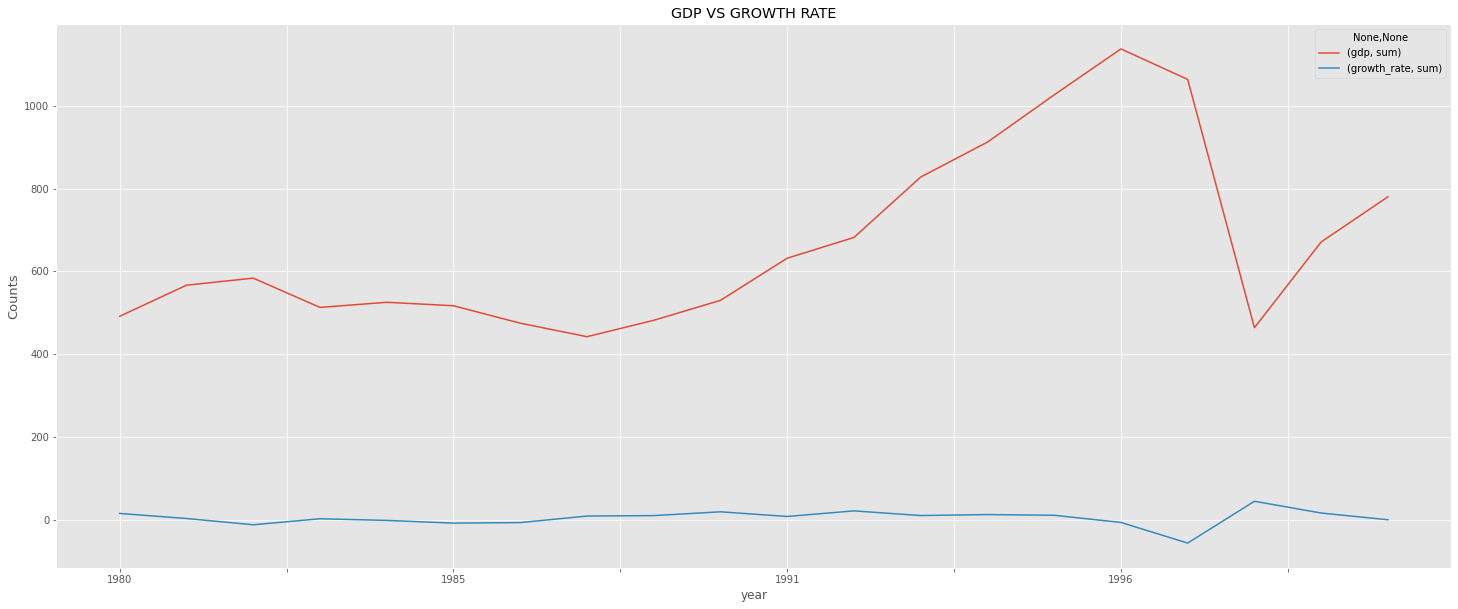

In [72]:
gdp= indo_trend2[indo_trend2['Country Name']=='Indonesia'].groupby(['year']).agg({'gdp':['sum']})
growth = indo_trend2[indo_trend2['Country Name']=='Indonesia'].groupby(['year']).agg({'growth_rate':['sum']})
total= gdp.join(growth)

plt.figure(figsize=(25,10))
total.plot(ax=plt.gca(), title='GDP VS GROWTH RATE')
plt.ylabel("Counts", size=13)

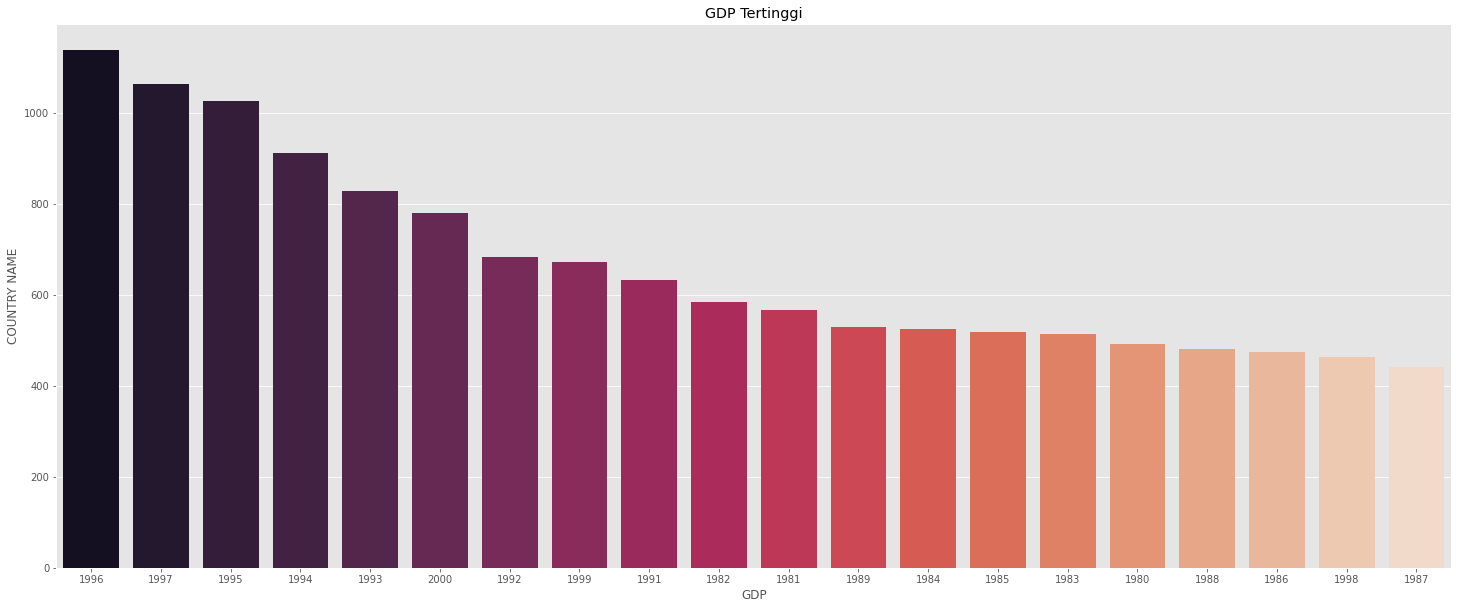

In [73]:
#GDP
import seaborn as sns
gdp = indo_trend2.sort_values('gdp', ascending=False)
figure = plt.figure(figsize=(25,10))
sns.barplot(data=gdp ,y="gdp", x="year",  color='c',palette="rocket")
plt.xlabel('GDP')
plt.ylabel('COUNTRY NAME')
plt.title('GDP Tertinggi')
plt.show()

#20 Tahun Ketiga

In [74]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,127.651518,130.353642,134.693838,142.159769,150.881897,161.073294,169.460786,181.245107,190.509423,208.707988,220.512563,235.010954,247.397499,314.706366,381.067655,394.683534,385.819322,419.837546,447.507715,525.232153,666.056080,673.777642,623.957120,639.640901,577.237128,490.345006,541.604003,641.267796,657.826222,655.786850,696.152646,703.654678,682.586851,665.242926,659.589902,722.169716,701.734197,718.854278,660.471966,635.143368,672.205474,591.088444,589.206824,757.449759,916.603367,1037.727057,1142.955902,1278.971341,1356.529948,1326.251549,1550.121225,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,144.368395,128.620051,129.678996,143.757635,195.490684,169.168529,200.226910,241.782075,333.289875,377.898463,444.504298,454.923088,482.618500,584.544785,718.901922,1317.316549,1136.794683,816.139286,656.904776,651.700457,585.078292,584.290054,561.525598,510.568346,594.899600,558.599040,547.823071,438.262311,376.354921,459.364903,495.779036,486.523016,484.090742,500.436180,502.031662,516.927934,605.061007,681.882359,826.816538,988.839394,1224.057612,1400.086007,1666.899847,1444.201899,1655.130138,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1

In [75]:
#perkembangan tiap 20 tahun
indo_2000_2020 = country_all[['Country Name','2001',	'2002',	'2003',	'2004',	'2005',	'2006',	'2007',	'2008',	'2009',	'2010',	'2011',	'2012',	'2013',	'2014',	'2015',	'2016',	'2017',	'2018',	'2019',	'2020']]
indo_2000_2020 = indo_2000_2020.loc[(indo_2000_2020['Country Name']=="Indonesia")]

In [76]:
country_all

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,0.000000,0.000000
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.660679,438.076142,543.302967,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,0.000000,0.000000,0.000000,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230436,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
6,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3238.690261,3496.532023,4218.271599,5342.168560,6320.809632,7169.101006,7151.249909,7751.843307,9127.812280,11818.473343,12378.784511,10372.786050,9610.020616,8025.207641,7728.906695,7775.614217,10361.147765,12615.126177,14304.640595,15165.281255,18878.852313,19534.263630,20549.805575,16515.658395,16235.068038,18458.173993,19016.288188,18355.627860,18895.110661,19262.308991,21854.246803,22970.512213,25067.240064,32272.845891,37966.187252,40064.224929,42674.758968,47804.849934,48719.658770,43504.215652,40850.248143,43334.811413,38686.461264,39540.724814,41303.929371,35770.776704,37475.635059,38964.904478,41791.969837,40897.330873,0.000000
...,...,...,...,...,.

In [77]:
indo_trend3 = pd.melt(indo_2000_2020,id_vars='Country Name',value_vars=indo_2000_2020.columns[1:])
indo_trend3.columns = ['Country Name','year','gdp']
indo_gdp3 = indo_trend3[(indo_trend3['Country Name'] == 'Indonesia')].reset_index()[['year','gdp']]

avg_gdp_indo3 = indo_gdp3.gdp
growth_rate = []
for i in range(19):
    growth_rate.append(round(((avg_gdp_indo3[i+1]-avg_gdp_indo3[i])/avg_gdp_indo3[i])*100,2))
growth_rate.append(np.nan)
indo_gdp3['growth_rate'] = growth_rate

In [78]:
indo_trend3

,Country Name,year,gdp
0,Indonesia,2001,748.257609
1,Indonesia,2002,900.177588
2,Indonesia,2003,1065.648520
3,Indonesia,2004,1150.261367
4,Indonesia,2005,1263.287332
5,Indonesia,2006,1589.801489
6,Indonesia,2007,1860.002811
7,Indonesia,2008,2166.854231
8,Indonesia,2009,2261.247309
9,Indonesia,2010,3122.362673


In [79]:
def create_fig(graph_obj,title='',x_title='',y_title=''):
    data = [graph_obj]
    layout = dict(title = dict(text=title),
              xaxis= dict(title=x_title,zeroline= False),
              yaxis= dict(title=y_title,zeroline= False)
             )
    fig = dict(data=data,layout=layout)
    return fig
def get_trend_plot(loc,country=False):
    indo_2000_2020 = indo_trend3[indo_trend3['Country Name'] == loc].reset_index()[['year','gdp']]
    gdp_series = indo_trend3.gdp
    growth_rate = []
    for i in range(19):
        growth_rate.append(round(((gdp_series[i+1]-gdp_series[i])/gdp_series[i])*100,3))
    growth_rate.append(np.nan)
    indo_trend3['growth_rate'] = growth_rate
    
    gdp_trace = go.Scatter(
    x = indo_trend3.year,
    y = indo_trend3.gdp,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'in USD')
    
    growth_rate_trace = go.Scatter(
    x = indo_trend3.year,
    y = indo_trend3.growth_rate,
    mode = "lines+markers",
    marker = dict(color = 'rgba(255, 0, 0, 0.69)'),
    text= 'Gross Domestic Product (Growth in %)')
    
    if(country):
        return gdp_trace,growth_rate_trace
    
    fig1_title = 'Gross Domestic Product Trend: ' + loc
    fig2_title = 'Gross Domestic Product Growth Rate Trend: ' + loc
    fig1 = create_fig(gdp_trace,fig1_title,'Year','Gross Domestic Product in USD')
    fig2 = create_fig(growth_rate_trace,fig2_title,'Year','Gross Domestic Product Growth Rate in %')
    
    return fig1, fig2

In [80]:
gdpTrend,rateTrend = get_trend_plot('Indonesia')
iplot(gdpTrend)
iplot(rateTrend)

Text(0, 0.5, 'Counts')

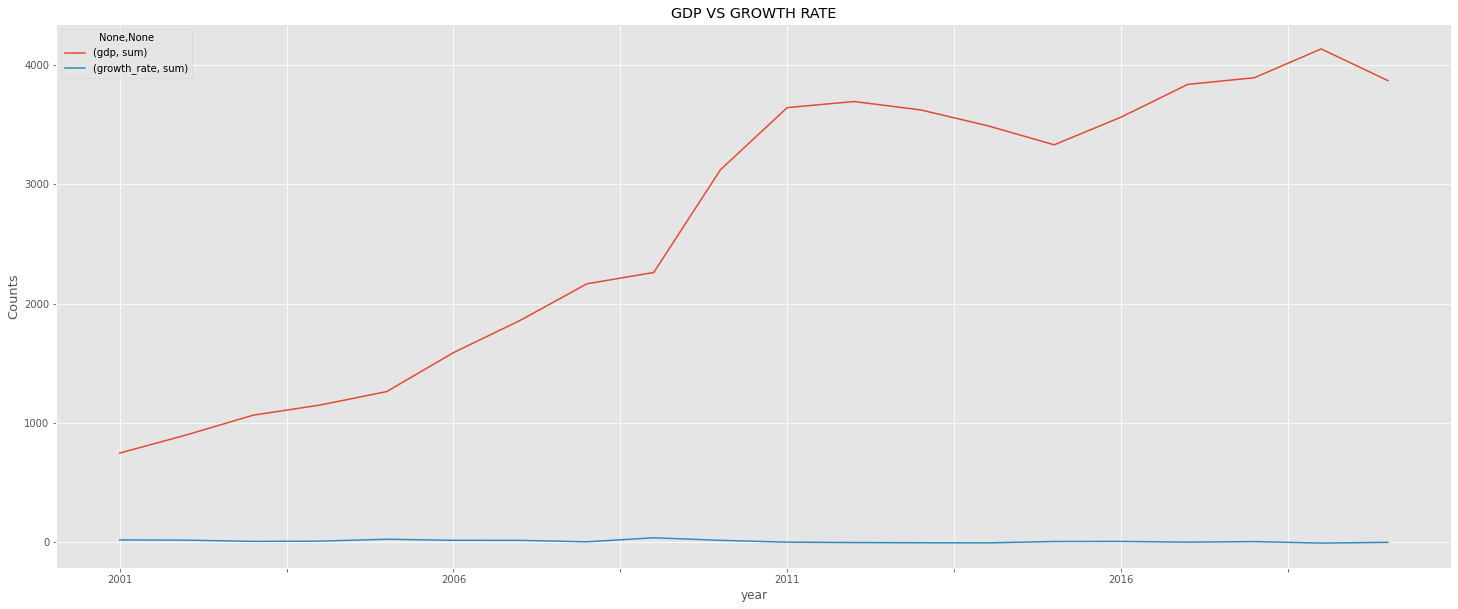

In [81]:
gdp= indo_trend3[indo_trend3['Country Name']=='Indonesia'].groupby(['year']).agg({'gdp':['sum']})
growth = indo_trend3[indo_trend3['Country Name']=='Indonesia'].groupby(['year']).agg({'growth_rate':['sum']})
total= gdp.join(growth)

plt.figure(figsize=(25,10))
total.plot(ax=plt.gca(), title='GDP VS GROWTH RATE')
plt.ylabel("Counts", size=13)

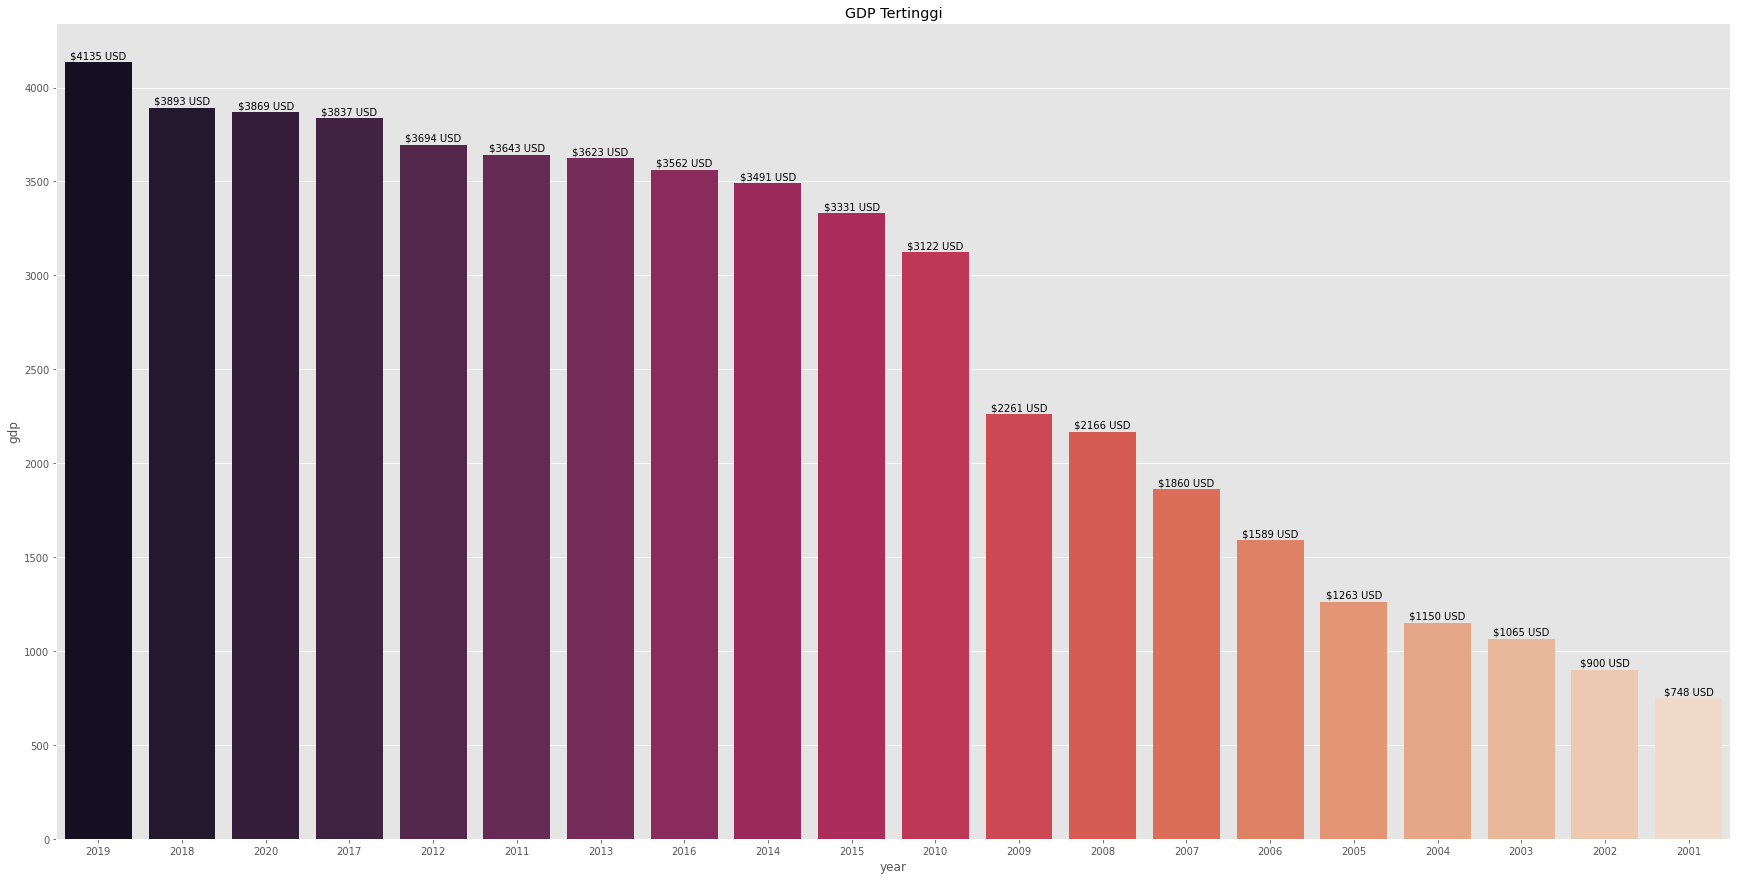

In [82]:
#GDP
import seaborn as sns
indo_trend3[['gdp','growth_rate']] = indo_trend3[['gdp','growth_rate']].apply(np.int64)
urut_gdp = indo_trend3.sort_values('gdp', ascending=False)
figure = plt.figure(figsize=(30,15))
ax = sns.barplot(palette="rocket",y="gdp", x="year", data = urut_gdp)
plt.title('GDP Tertinggi')
for bar, label in zip(ax.patches, urut_gdp['gdp']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()+21
    label = f'${label} USD'
    ax.text(x+width/2, height, label, ha="center") 

# before after covid

In [83]:
compare = dataset[['Country Name','2018',	'2019']]
compare

,Country Name,2018,2019
0,Aruba,30253.279358,0.000000
1,Africa Eastern and Southern,1530.161917,1481.425292
2,Afghanistan,493.756581,507.103392
3,Africa Western and Central,1695.959215,1772.339155
4,Angola,3289.643995,2809.626088
...,...,...,...
260,Kosovo,4419.914327,4445.890702
261,Yemen,824.117718,0.000000
262,South Africa,6372.605655,6001.401121
263,Zambia,1516.371100,1305.002214


In [84]:
compare.shape

(265, 3)

In [85]:
indo_trend4 = pd.melt(compare,id_vars='Country Name',value_vars=compare.columns[1:])
indo_trend4.columns = ['Country Name','year','gdp']
indogdp = indo_trend4[indo_trend4['Country Name'] == 'Indonesia'].reset_index()[['year','gdp']]

avg_gdp = indogdp.gdp
growth_rate = []
for i in range(1):
    growth_rate.append(round(((avg_gdp[i+1]-avg_gdp[i])/avg_gdp[i])*100,3))
growth_rate.append(np.nan)
indogdp['growth_rate'] = growth_rate

In [86]:
indogdp

,year,gdp,growth_rate
0,2018,3893.859578,6.198
1,2019,4135.201531,NaN


In [87]:
fig = ply.line(indogdp, x="year", y="gdp",title="GDP INDONESIA IN 2018 & 2019",hover_data=['gdp'],height=850,template="plotly_dark")
fig.show()

In [88]:
compare = dataset[['Country Name','2019',	'2020']]
compare

,Country Name,2019,2020
0,Aruba,0.000000,0.000000
1,Africa Eastern and Southern,1481.425292,1326.663658
2,Afghanistan,507.103392,508.808409
3,Africa Western and Central,1772.339155,1714.426800
4,Angola,2809.626088,1895.770869
...,...,...,...
260,Kosovo,4445.890702,4287.200903
261,Yemen,0.000000,0.000000
262,South Africa,6001.401121,5090.715025
263,Zambia,1305.002214,1050.919283


In [89]:
indo_trend4 = pd.melt(compare,id_vars='Country Name',value_vars=compare.columns[1:])
indo_trend4.columns = ['Country Name','year','gdp']
indogdp = indo_trend4[indo_trend4['Country Name'] == 'Indonesia'].reset_index()[['year','gdp']]

avg_gdp = indogdp.gdp
growth_rate = []
for i in range(1):
    growth_rate.append(round(((avg_gdp[i+1]-avg_gdp[i])/avg_gdp[i])*100,3))
growth_rate.append(np.nan)
indogdp['growth_rate'] = growth_rate

In [90]:
indogdp

,year,gdp,growth_rate
0,2019,4135.201531,-6.423
1,2020,3869.588427,NaN


In [91]:
fig = ply.line(indogdp, x="year", y="gdp",title="GDP INDONESIA IN 2019 & 2020",hover_data=['gdp'],height=850,template="plotly_dark")
fig.show()

# Vulnerable Employment

In [92]:
dataset_vulnerable = pd.read_csv('/content/drive/MyDrive/vulnerable_sector.csv')
dataset_vulnerable = dataset_vulnerable.fillna(0)
dataset_vulnerable

,Year,Country,Total employment in agriculture (thousands),Male employment in agriculture (thousands),Female employment in agriculture (thousands),Total employment in industry (thousands),Male employment in industry (thousands),Female employment in industry (thousands),Total employment in services (thousands),Male employment in services (thousands),Female employment in services (thousands)
0,1991,WORLD,1004690,570689,434000,490343,342721,147622,763214,457553,305661
1,1992,WORLD,1022644,580014,442630,495904,346776,149128,789894,472117,317777
2,1993,WORLD,1017735,578207,439527,500642,350179,150462,819099,488231,330868
3,1994,WORLD,1017844,578249,439596,506898,354940,151957,853847,506477,347370
4,1995,WORLD,1011170,576028,435141,513421,360042,153379,891702,525840,365862
...,...,...,...,...,...,...,...,...,...,...,...
5259,2014,Zimbabwe,4794,2220,2574,679,575,104,1815,890,925
5260,2015,Zimbabwe,4954,2295,2659,720,606,114,1909,934,975
5261,2016,Zimbabwe,5100,2364,2736,762,637,125,2004,979,1026
5262,2017,Zimbabwe,5236,2429,2808,805,668,137,2099,1023,1076


In [93]:
world_vulnerable = dataset_vulnerable.rename(columns={'Year':'year','Country':'country',
                                                      'Total employment in agriculture (thousands)':'total_agriculture',
                                                      'Male employment in agriculture (thousands)':'male_agriculture',
                                                      'Female employment in agriculture (thousands)':'female_agriculture',
                                                      'Total employment in industry (thousands)':'total_industry',
                                                      'Male employment in industry (thousands)':'male_industry',
                                                      'Female employment in industry (thousands)':'female_industry',
                                                      'Total employment in services (thousands)':'total_services',
                                                      'Male employment in services (thousands)':'male_services',
                                                      'Female employment in services (thousands)':'female_services'})
world_vulnerable

,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
0,1991,WORLD,1004690,570689,434000,490343,342721,147622,763214,457553,305661
1,1992,WORLD,1022644,580014,442630,495904,346776,149128,789894,472117,317777
2,1993,WORLD,1017735,578207,439527,500642,350179,150462,819099,488231,330868
3,1994,WORLD,1017844,578249,439596,506898,354940,151957,853847,506477,347370
4,1995,WORLD,1011170,576028,435141,513421,360042,153379,891702,525840,365862
...,...,...,...,...,...,...,...,...,...,...,...
5259,2014,Zimbabwe,4794,2220,2574,679,575,104,1815,890,925
5260,2015,Zimbabwe,4954,2295,2659,720,606,114,1909,934,975
5261,2016,Zimbabwe,5100,2364,2736,762,637,125,2004,979,1026
5262,2017,Zimbabwe,5236,2429,2808,805,668,137,2099,1023,1076


# Total Employment each sector in World

In [95]:
total_world= world_vulnerable[world_vulnerable['country'] == 'WORLD']
total_world

,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
0,1991,WORLD,1004690,570689,434000,490343,342721,147622,763214,457553,305661
1,1992,WORLD,1022644,580014,442630,495904,346776,149128,789894,472117,317777
2,1993,WORLD,1017735,578207,439527,500642,350179,150462,819099,488231,330868
3,1994,WORLD,1017844,578249,439596,506898,354940,151957,853847,506477,347370
4,1995,WORLD,1011170,576028,435141,513421,360042,153379,891702,525840,365862
5,1996,WORLD,1008309,575434,432875,521773,365720,156053,923278,543008,380269
6,1997,WORLD,1010757,576760,433997,529962,371965,157997,949320,556397,392923
7,1998,WORLD,1025093,585594,439499,528813,371801,157012,971059,568225,402834
8,1999,WORLD,1045501,596636,448865,531268,374205,157063,996350,581157,415193
9,2000,WORLD,1056526,602465,454061,536299,378196,158103,1020596,594036,426561


In [96]:
total_world[['year','country','total_agriculture',	'total_industry',	'total_services']] = total_world[['year','country','total_agriculture',	'total_industry',	'total_services']]
total_world

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
0,1991,WORLD,1004690,570689,434000,490343,342721,147622,763214,457553,305661
1,1992,WORLD,1022644,580014,442630,495904,346776,149128,789894,472117,317777
2,1993,WORLD,1017735,578207,439527,500642,350179,150462,819099,488231,330868
3,1994,WORLD,1017844,578249,439596,506898,354940,151957,853847,506477,347370
4,1995,WORLD,1011170,576028,435141,513421,360042,153379,891702,525840,365862
5,1996,WORLD,1008309,575434,432875,521773,365720,156053,923278,543008,380269
6,1997,WORLD,1010757,576760,433997,529962,371965,157997,949320,556397,392923
7,1998,WORLD,1025093,585594,439499,528813,371801,157012,971059,568225,402834
8,1999,WORLD,1045501,596636,448865,531268,374205,157063,996350,581157,415193
9,2000,WORLD,1056526,602465,454061,536299,378196,158103,1020596,594036,426561


In [97]:
total_sector = pd.melt(total_world, id_vars =['year'], value_vars =['total_agriculture', 'total_industry','total_services'])

In [98]:
total_sector

,year,variable,value
0,1991,total_agriculture,1004690
1,1992,total_agriculture,1022644
2,1993,total_agriculture,1017735
3,1994,total_agriculture,1017844
4,1995,total_agriculture,1011170
...,...,...,...
79,2014,total_services,1448062
80,2015,total_services,1477667
81,2016,total_services,1506533
82,2017,total_services,1535106


In [99]:
sector = total_sector.replace(['total_agriculture','total_industry','total_services'],['Agriculture','Industry','Services'])

In [100]:
sector

,year,variable,value
0,1991,Agriculture,1004690
1,1992,Agriculture,1022644
2,1993,Agriculture,1017735
3,1994,Agriculture,1017844
4,1995,Agriculture,1011170
...,...,...,...
79,2014,Services,1448062
80,2015,Services,1477667
81,2016,Services,1506533
82,2017,Services,1535106


In [101]:
sector = sector.rename(columns={'variable':'Sector','value':'Total'})

In [102]:
#Sector in Sector World
fig = ply.pie(sector, values='Total', names='Sector', title='Comparison Sector of employment (World)', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [103]:
# totall = sector.sort_values('Total', ascending=False)
fig = ply.line(sector, x="year", y="Total", color='Sector',title="Emplyment Trend Each Sector (World)",height=700,template="plotly_dark")
fig.show()

# fix

In [106]:
import pycountry
list(pycountry.countries)

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia'),
 Country(alpha_2='AS', alpha_3='ASM', nam

In [107]:
countries_list = [ x.name for x in pycountry.countries]
result = world_vulnerable['country'].isin(countries_list)
n=[]
for x in range(len(result)):
    if(result[x]==False):
        n.append(x)
len(n)

812

In [108]:
country_all = world_vulnerable.drop(n,axis=0)
country_all.count()

year                  4452
country               4452
total_agriculture     4452
male_agriculture      4452
female_agriculture    4452
total_industry        4452
male_industry         4452
female_industry       4452
total_services        4452
male_services         4452
female_services       4452
dtype: int64

# Asian Rank (Total Employment)

In [109]:
asian_Country = country_all.loc[(country_all['country'] == 'Taiwan')|(country_all['country'] == 'Turkey')|(country_all['country'] == 'Myanmar')|(country_all['country'] == 'East Timor')|(country_all['country'] == 'Afghanistan')|(country_all['country'] == 'Armenia')|(country_all['country'] == 'Azerbaijan')|(country_all['country'] == 'Bahrain')|(country_all['country'] == 'Bangladesh')|(country_all['country'] == 'Bhutan')|(country_all['country'] == 'Brunei')|(country_all['country'] == 'Burma')|(country_all['country'] == 'Cambodia')|(country_all['country'] == 'China')|(country_all['country'] == 'Cyprus')|(country_all['country'] == 'Georgia')|(country_all['country'] == 'India')|(country_all['country'] == 'Indonesia')|(country_all['country'] == 'Iran')|(country_all['country'] == 'Iraq')|(country_all['country'] == 'Israel')|(country_all['country'] == 'Japan')|(country_all['country'] == 'Jordan')|(country_all['country'] == 'Kazakhstan')|(country_all['country'] == 'Kuwait')|(country_all['country'] == 'Kyrgyzstan')|(country_all['country'] == 'Laos')|(country_all['country'] == 'Lebanon')|(country_all['country'] == 'Malaysia')|(country_all['country'] == 'Maldives')|(country_all['country'] == 'Mongolia')|(country_all['country'] == 'Nepal')|(country_all['country'] == 'North Korea')|(country_all['country'] == 'Oman')|(country_all['country'] == 'Pakistan')|(country_all['country'] == 'Palestine')|(country_all['country'] == 'Philippines')|(country_all['country'] == 'Qatar')|(country_all['country'] == 'Saudi Arabia')|(country_all['country'] == 'Singapore')|(country_all['country'] == 'South Korea')|(country_all['country'] == 'Sri Lanka')|(country_all['country'] == 'Syria')|(country_all['country'] == 'Tajikistan')|(country_all['country'] == 'Thailand')|(country_all['country'] == 'Turkmenistan')|(country_all['country'] == 'United Arab Emirates')|(country_all['country'] == 'Uzbekistan')|(country_all['country'] == 'Vietnam')|(country_all['country'] == 'Yemen')]
display(asian_Country)

,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
112,1991,Cyprus,37,21,16,87,61,26,179,109,70
113,1992,Cyprus,36,21,15,93,66,27,199,120,79
114,1993,Cyprus,31,19,12,89,64,25,200,118,81
115,1994,Cyprus,30,18,12,93,68,25,220,128,91
116,1995,Cyprus,27,17,10,93,70,23,228,133,95
...,...,...,...,...,...,...,...,...,...,...,...
3775,2014,Yemen,2699,1622,1077,866,851,16,2591,2479,111
3776,2015,Yemen,2784,1659,1125,908,890,18,2711,2592,119
3777,2016,Yemen,2877,1700,1177,953,933,20,2845,2717,128
3778,2017,Yemen,2965,1737,1228,999,976,23,2979,2842,137


In [110]:
total_sector = pd.melt(asian_Country, id_vars =['year','country'], value_vars =['total_agriculture', 'total_industry','total_services'])
sector = total_sector.replace(['total_agriculture','total_industry','total_services'],['Agriculture','Industry','Services'])
sector = sector.rename(columns={'variable':'Sector','value':'Total'})
sector

,year,country,Sector,Total
0,1991,Cyprus,Agriculture,37
1,1992,Cyprus,Agriculture,36
2,1993,Cyprus,Agriculture,31
3,1994,Cyprus,Agriculture,30
4,1995,Cyprus,Agriculture,27
...,...,...,...,...
3271,2014,Yemen,Services,2591
3272,2015,Yemen,Services,2711
3273,2016,Yemen,Services,2845
3274,2017,Yemen,Services,2979


In [111]:
#Sector in Sector Asia
fig = ply.pie(sector, values='Total', names='Sector', title='Comparison Sector of employment (Asia)', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

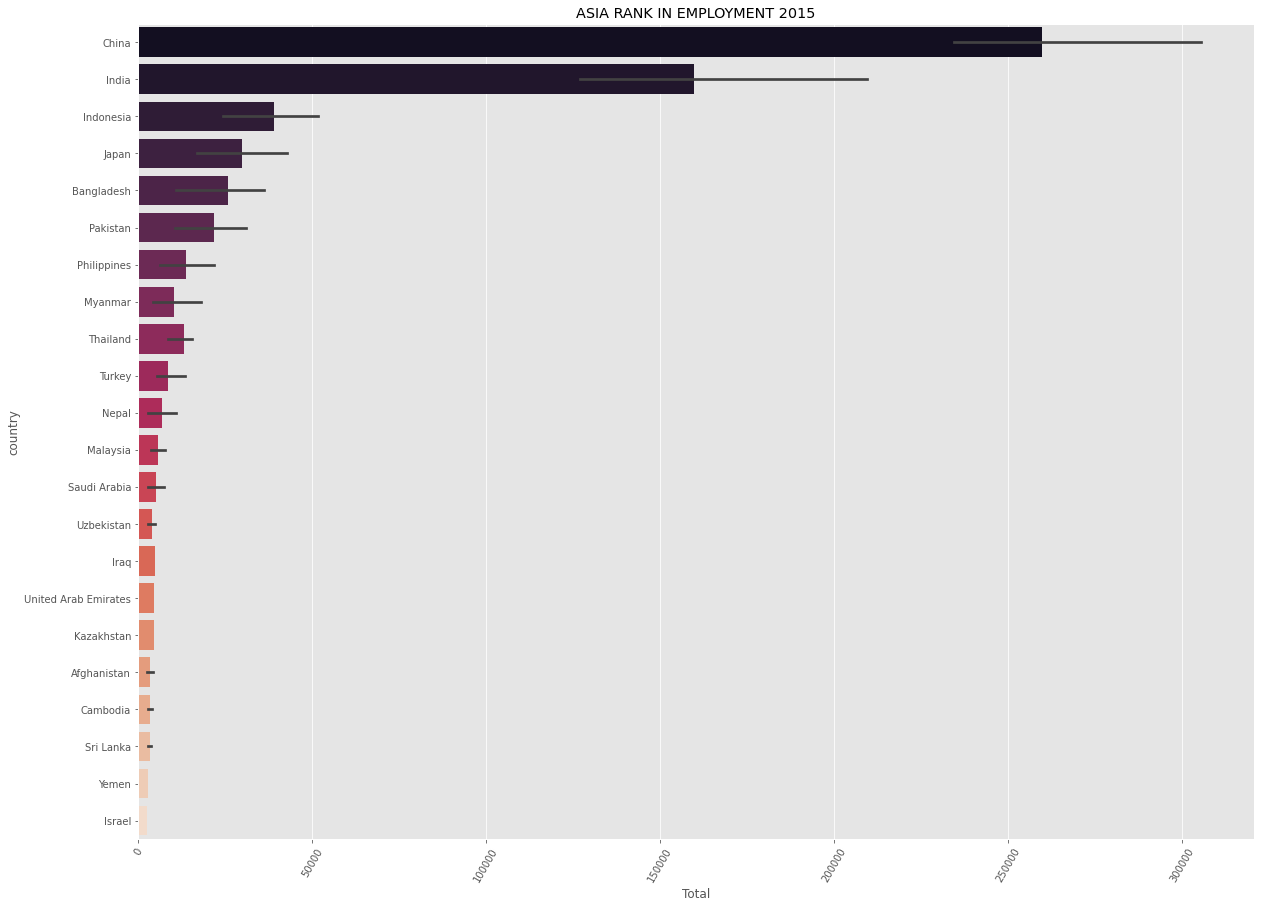

In [112]:
plt.figure(figsize=(20, 15))
var_2015 = sector.loc[(sector['year']==2015)]
gdp_2019 = var_2015[['country','Total']].sort_values(by='Total', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN EMPLOYMENT 2015")
sns.barplot(x='Total', y='country', data=gdp_2019.head(50),palette='rocket')

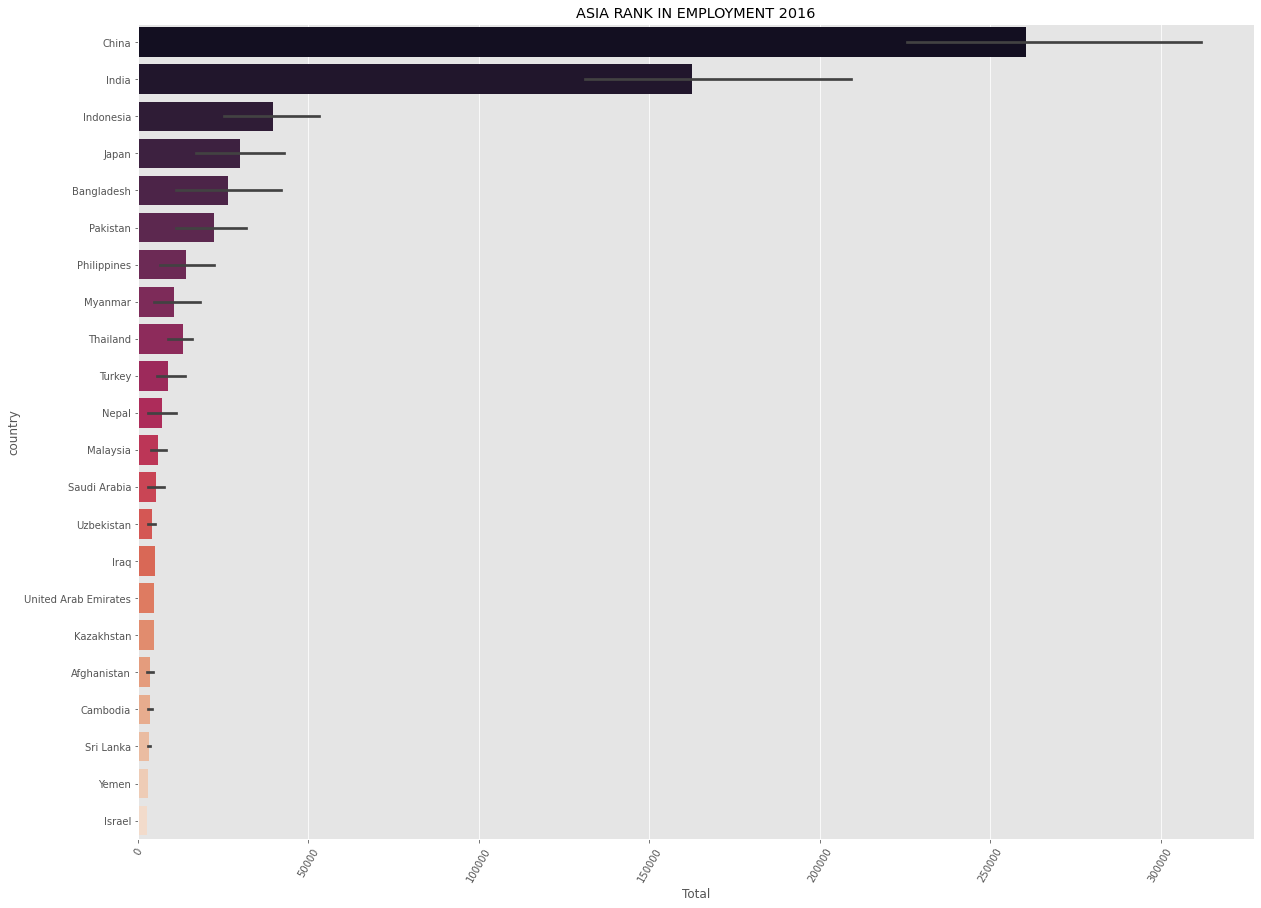

In [113]:
plt.figure(figsize=(20, 15))
var_2016 = sector.loc[(sector['year']==2016)]
gdp_2019 = var_2016[['country','Total']].sort_values(by='Total', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN EMPLOYMENT 2016")
sns.barplot(x='Total', y='country', data=gdp_2019.head(50),palette='rocket')

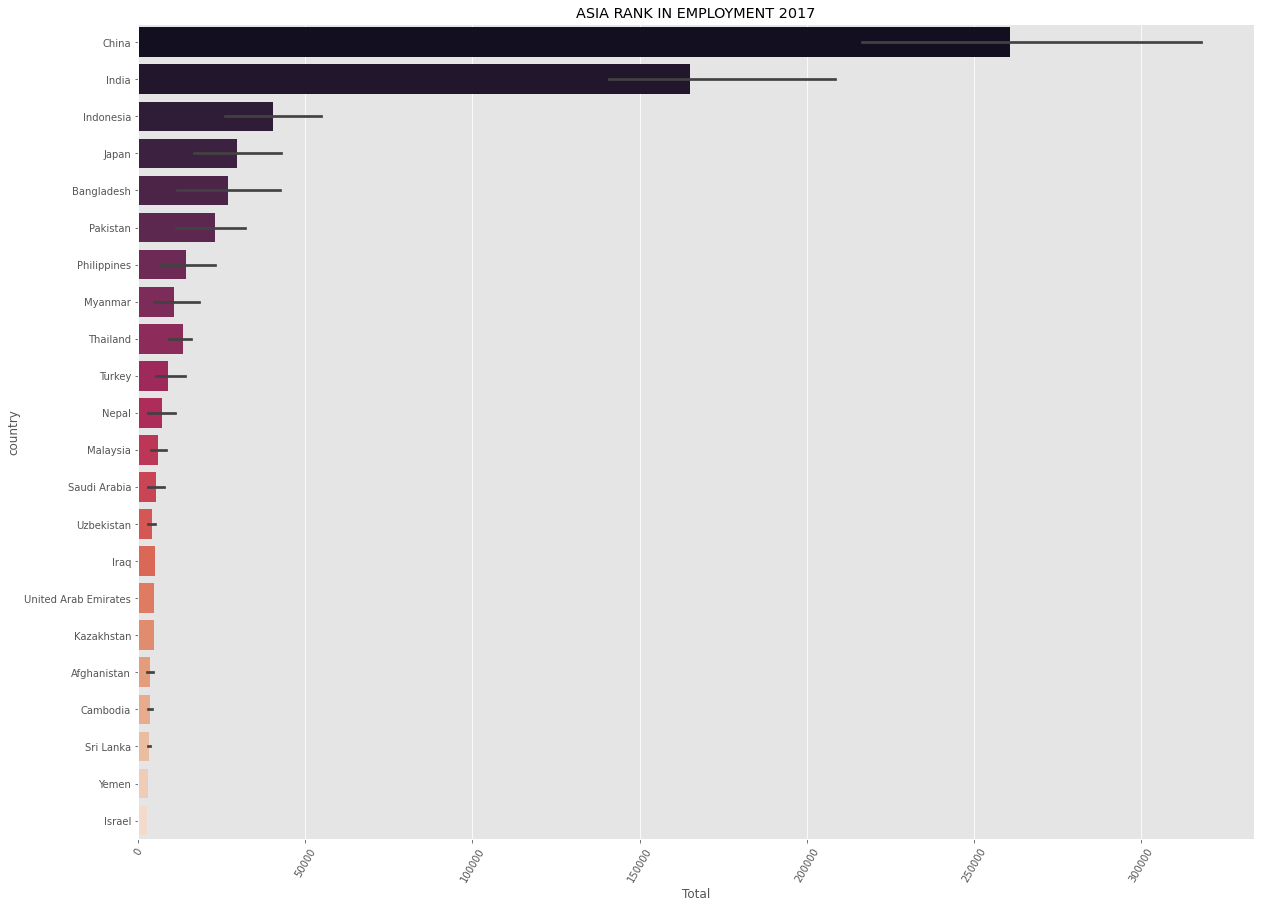

In [114]:
plt.figure(figsize=(20, 15))
var_2017 = sector.loc[(sector['year']==2017)]
gdp_2019 = var_2017[['country','Total']].sort_values(by='Total', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN EMPLOYMENT 2017")
sns.barplot(x='Total', y='country', data=gdp_2019.head(50),palette='rocket')

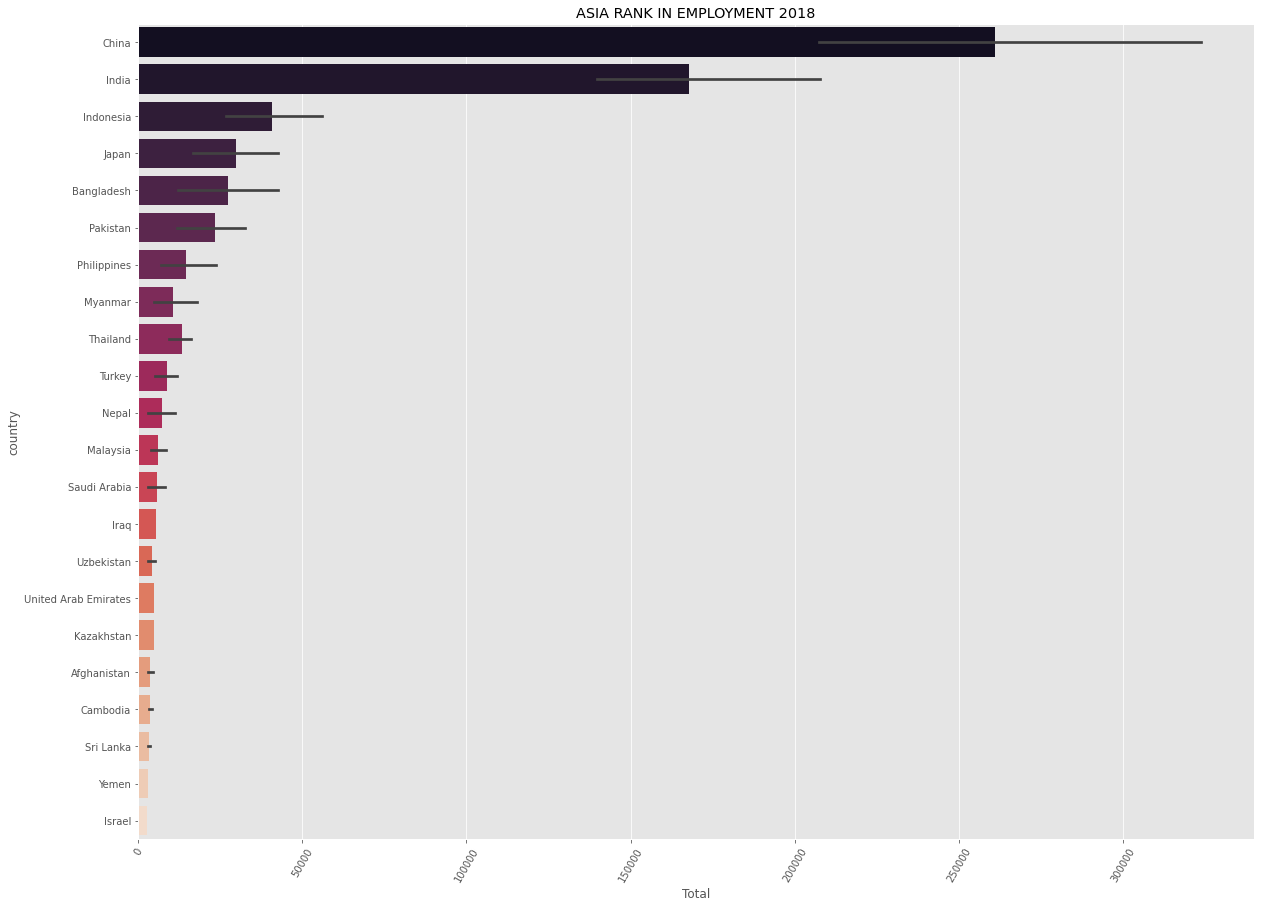

In [115]:
plt.figure(figsize=(20, 15))
var_2018 = sector.loc[(sector['year']==2018)]
gdp_2019 = var_2018[['country','Total']].sort_values(by='Total', ascending=False)
plt.xticks(rotation=60)
plt.title("ASIA RANK IN EMPLOYMENT 2018")
sns.barplot(x='Total', y='country', data=gdp_2019.head(50),palette='rocket')

In [116]:
var_2018 = sector.loc[(sector['year']==2018)]
fig = ply.choropleth(var_2018, locations="country", locationmode='country names', color='Total',height=700,
                    hover_name="Total", hover_data=['Total'],
                    title='Employment 2018 over asia Countries', template='plotly_dark', color_continuous_scale='haline',scope="asia")
fig.show()

# Indonesia (Total Employment)

In [117]:
indo = country_all.loc[(country_all['country'] == 'Indonesia')]
display(indo)

,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
1932,1991,Indonesia,38548,23808,14740,10404,6938,3465,22437,13671,8766
1933,1992,Indonesia,41480,25449,16031,10657,7022,3636,23397,14739,8658
1934,1993,Indonesia,39087,24194,14893,12134,7942,4192,25911,15960,9951
1935,1994,Indonesia,36562,22253,14309,14789,9885,4904,27722,16769,10953
1936,1995,Indonesia,36485,22671,13814,15255,10206,5049,31173,18525,12647
1937,1996,Indonesia,37563,23068,14495,15477,10352,5125,32320,19724,12596
1938,1997,Indonesia,35095,21763,13332,16216,11039,5177,33890,20653,13237
1939,1998,Indonesia,38497,23509,14988,13964,9432,4533,33205,20170,13034
1940,1999,Indonesia,39280,24241,15039,15229,10822,4407,35417,20988,14429
1941,2000,Indonesia,41513,25474,16039,16023,10867,5155,34213,21057,13156


In [118]:
total_sector = pd.melt(indo, id_vars =['year','country'], value_vars =['total_agriculture', 'total_industry','total_services'])
sector_indo = total_sector.replace(['total_agriculture','total_industry','total_services'],['Agriculture','Industry','Services'])
sector_indo = sector_indo.rename(columns={'variable':'Sector','value':'Total'})
sector

,year,country,Sector,Total
0,1991,Cyprus,Agriculture,37
1,1992,Cyprus,Agriculture,36
2,1993,Cyprus,Agriculture,31
3,1994,Cyprus,Agriculture,30
4,1995,Cyprus,Agriculture,27
...,...,...,...,...
3271,2014,Yemen,Services,2591
3272,2015,Yemen,Services,2711
3273,2016,Yemen,Services,2845
3274,2017,Yemen,Services,2979


In [253]:
#Sector in Sector Asia
fig = ply.pie(sector_indo, values='Total', names='Sector', title='Comparison Sector of employment (Indonesia)', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label+value+value')
fig.show()

In [256]:
fig = ply.line(sector_indo, x="year", y="Total", color='Sector',title="Employment Trend Each Sector (Indonesia)",height=700,template="plotly_dark")
fig.show()

# Total Employment each gender in World

In [179]:
total_world= world_vulnerable[world_vulnerable['country'] == 'WORLD']
total_world

,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
0,1991,WORLD,1004690,570689,434000,490343,342721,147622,763214,457553,305661
1,1992,WORLD,1022644,580014,442630,495904,346776,149128,789894,472117,317777
2,1993,WORLD,1017735,578207,439527,500642,350179,150462,819099,488231,330868
3,1994,WORLD,1017844,578249,439596,506898,354940,151957,853847,506477,347370
4,1995,WORLD,1011170,576028,435141,513421,360042,153379,891702,525840,365862
5,1996,WORLD,1008309,575434,432875,521773,365720,156053,923278,543008,380269
6,1997,WORLD,1010757,576760,433997,529962,371965,157997,949320,556397,392923
7,1998,WORLD,1025093,585594,439499,528813,371801,157012,971059,568225,402834
8,1999,WORLD,1045501,596636,448865,531268,374205,157063,996350,581157,415193
9,2000,WORLD,1056526,602465,454061,536299,378196,158103,1020596,594036,426561


In [180]:
total_world[['year','country','male_agriculture',	'female_agriculture',	'male_industry','female_industry','male_services','female_services']] = total_world[['year','country','male_agriculture','female_agriculture',	'male_industry','female_industry','male_services','female_services']]
total_world

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
0,1991,WORLD,1004690,570689,434000,490343,342721,147622,763214,457553,305661
1,1992,WORLD,1022644,580014,442630,495904,346776,149128,789894,472117,317777
2,1993,WORLD,1017735,578207,439527,500642,350179,150462,819099,488231,330868
3,1994,WORLD,1017844,578249,439596,506898,354940,151957,853847,506477,347370
4,1995,WORLD,1011170,576028,435141,513421,360042,153379,891702,525840,365862
5,1996,WORLD,1008309,575434,432875,521773,365720,156053,923278,543008,380269
6,1997,WORLD,1010757,576760,433997,529962,371965,157997,949320,556397,392923
7,1998,WORLD,1025093,585594,439499,528813,371801,157012,971059,568225,402834
8,1999,WORLD,1045501,596636,448865,531268,374205,157063,996350,581157,415193
9,2000,WORLD,1056526,602465,454061,536299,378196,158103,1020596,594036,426561


In [206]:
total_gender = pd.melt(total_world, id_vars =['year'], value_vars =['male_agriculture',	'female_agriculture',	'male_industry','female_industry','male_services','female_services'])
total_gender

,year,variable,value
0,1991,male_agriculture,570689
1,1992,male_agriculture,580014
2,1993,male_agriculture,578207
3,1994,male_agriculture,578249
4,1995,male_agriculture,576028
...,...,...,...
163,2014,female_services,625739
164,2015,female_services,637343
165,2016,female_services,648375
166,2017,female_services,659207


In [207]:
d = {'Agriculture': ['male_agriculture','female_agriculture'], 'Industry': ['male_industry','female_industry'], 'Services': ['male_services', 'female_services']}
d2 = {}
for k, v in d.items():
    for item in v:
        d2[item] = k

In [208]:
d2

{'female_agriculture': 'Agriculture',
 'female_industry': 'Industry',
 'female_services': 'Services',
 'male_agriculture': 'Agriculture',
 'male_industry': 'Industry',
 'male_services': 'Services'}

In [209]:
total_gender['Sector'] = total_gender['variable'].map(d2)

In [210]:
total_gender

,year,variable,value,Sector
0,1991,male_agriculture,570689,Agriculture
1,1992,male_agriculture,580014,Agriculture
2,1993,male_agriculture,578207,Agriculture
3,1994,male_agriculture,578249,Agriculture
4,1995,male_agriculture,576028,Agriculture
...,...,...,...,...
163,2014,female_services,625739,Services
164,2015,female_services,637343,Services
165,2016,female_services,648375,Services
166,2017,female_services,659207,Services


In [211]:
gender = total_gender.replace(['male_agriculture',	'female_agriculture','male_industry',	'female_industry', 'male_services', 'female_services'],['Male',	'Female','Male',	'Female','Male',	'Female'])
gender

,year,variable,value,Sector
0,1991,Male,570689,Agriculture
1,1992,Male,580014,Agriculture
2,1993,Male,578207,Agriculture
3,1994,Male,578249,Agriculture
4,1995,Male,576028,Agriculture
...,...,...,...,...
163,2014,Female,625739,Services
164,2015,Female,637343,Services
165,2016,Female,648375,Services
166,2017,Female,659207,Services


In [217]:
gender = gender.rename(columns={'variable':'Gender','value':'Total'})
gender

,year,Gender,Total,Sector
0,1991,Male,570689,Agriculture
1,1992,Male,580014,Agriculture
2,1993,Male,578207,Agriculture
3,1994,Male,578249,Agriculture
4,1995,Male,576028,Agriculture
...,...,...,...,...
163,2014,Female,625739,Services
164,2015,Female,637343,Services
165,2016,Female,648375,Services
166,2017,Female,659207,Services


In [218]:
#Sector in Sector World
fig = ply.pie(gender, values='Total', names='Gender', title='Comparison Gender of employment (World)', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [221]:
#Male
male = gender.loc[(gender['Gender'] == 'Male')]
fig = ply.line(male, x="year", y="Total", color='Sector',title="Emplyment Trend Male in (World)",height=700,template="plotly_dark")
fig.show()

In [190]:
#Female
female = gender.loc[(gender['Gender'] == 'Female')]
fig = ply.line(female, x="year", y="Total", color='Sector',title="Emplyment Trend Female in (World)",height=700,template="plotly_dark")
fig.show()

# Asian Rank (Total Employment by Gender)

In [239]:
asian_Country = country_all.loc[(country_all['country'] == 'Taiwan')|(country_all['country'] == 'Turkey')|(country_all['country'] == 'Myanmar')|(country_all['country'] == 'East Timor')|(country_all['country'] == 'Afghanistan')|(country_all['country'] == 'Armenia')|(country_all['country'] == 'Azerbaijan')|(country_all['country'] == 'Bahrain')|(country_all['country'] == 'Bangladesh')|(country_all['country'] == 'Bhutan')|(country_all['country'] == 'Brunei')|(country_all['country'] == 'Burma')|(country_all['country'] == 'Cambodia')|(country_all['country'] == 'China')|(country_all['country'] == 'Cyprus')|(country_all['country'] == 'Georgia')|(country_all['country'] == 'India')|(country_all['country'] == 'Indonesia')|(country_all['country'] == 'Iran')|(country_all['country'] == 'Iraq')|(country_all['country'] == 'Israel')|(country_all['country'] == 'Japan')|(country_all['country'] == 'Jordan')|(country_all['country'] == 'Kazakhstan')|(country_all['country'] == 'Kuwait')|(country_all['country'] == 'Kyrgyzstan')|(country_all['country'] == 'Laos')|(country_all['country'] == 'Lebanon')|(country_all['country'] == 'Malaysia')|(country_all['country'] == 'Maldives')|(country_all['country'] == 'Mongolia')|(country_all['country'] == 'Nepal')|(country_all['country'] == 'North Korea')|(country_all['country'] == 'Oman')|(country_all['country'] == 'Pakistan')|(country_all['country'] == 'Palestine')|(country_all['country'] == 'Philippines')|(country_all['country'] == 'Qatar')|(country_all['country'] == 'Saudi Arabia')|(country_all['country'] == 'Singapore')|(country_all['country'] == 'South Korea')|(country_all['country'] == 'Sri Lanka')|(country_all['country'] == 'Syria')|(country_all['country'] == 'Tajikistan')|(country_all['country'] == 'Thailand')|(country_all['country'] == 'Turkmenistan')|(country_all['country'] == 'United Arab Emirates')|(country_all['country'] == 'Uzbekistan')|(country_all['country'] == 'Vietnam')|(country_all['country'] == 'Yemen')]
display(asian_Country)

,year,country,total_agriculture,male_agriculture,female_agriculture,total_industry,male_industry,female_industry,total_services,male_services,female_services
112,1991,Cyprus,37,21,16,87,61,26,179,109,70
113,1992,Cyprus,36,21,15,93,66,27,199,120,79
114,1993,Cyprus,31,19,12,89,64,25,200,118,81
115,1994,Cyprus,30,18,12,93,68,25,220,128,91
116,1995,Cyprus,27,17,10,93,70,23,228,133,95
...,...,...,...,...,...,...,...,...,...,...,...
3775,2014,Yemen,2699,1622,1077,866,851,16,2591,2479,111
3776,2015,Yemen,2784,1659,1125,908,890,18,2711,2592,119
3777,2016,Yemen,2877,1700,1177,953,933,20,2845,2717,128
3778,2017,Yemen,2965,1737,1228,999,976,23,2979,2842,137


In [240]:
total_gender = pd.melt(asian_Country, id_vars =['year','country'], value_vars =['male_agriculture',	'female_agriculture',	'male_industry','female_industry','male_services','female_services'])
total_gender

,year,country,variable,value
0,1991,Cyprus,male_agriculture,21
1,1992,Cyprus,male_agriculture,21
2,1993,Cyprus,male_agriculture,19
3,1994,Cyprus,male_agriculture,18
4,1995,Cyprus,male_agriculture,17
...,...,...,...,...
6547,2014,Yemen,female_services,111
6548,2015,Yemen,female_services,119
6549,2016,Yemen,female_services,128
6550,2017,Yemen,female_services,137


In [241]:
d = {'Agriculture': ['male_agriculture','female_agriculture'], 'Industry': ['male_industry','female_industry'], 'Services': ['male_services', 'female_services']}
d2 = {}
for k, v in d.items():
    for item in v:
        d2[item] = k
total_gender['Sector'] = total_gender['variable'].map(d2)
gender = total_gender.replace(['male_agriculture',	'female_agriculture','male_industry',	'female_industry', 'male_services', 'female_services'],['Male',	'Female','Male',	'Female','Male',	'Female'])
gender = gender.rename(columns={'variable':'Gender','value':'Total'})
gender

,year,country,Gender,Total,Sector
0,1991,Cyprus,Male,21,Agriculture
1,1992,Cyprus,Male,21,Agriculture
2,1993,Cyprus,Male,19,Agriculture
3,1994,Cyprus,Male,18,Agriculture
4,1995,Cyprus,Male,17,Agriculture
...,...,...,...,...,...
6547,2014,Yemen,Female,111,Services
6548,2015,Yemen,Female,119,Services
6549,2016,Yemen,Female,128,Services
6550,2017,Yemen,Female,137,Services


In [242]:
#Sector in Sector World
fig = ply.pie(gender, values='Total', names='Sector', title='Comparison Sector of employment (Asia)', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [244]:
#Male
male = gender.loc[(gender['Gender'] == 'Male')]
fig = ply.bar(male, x="year", y="Total", color='Sector',title="Emplyment Trend Male in (Asian)",height=700,template="plotly_dark")
fig.show()

In [245]:
#Male
male = gender.loc[(gender['Gender'] == 'Female')]
fig = ply.bar(male, x="year", y="Total", color='Sector',title="Emplyment Trend Female in (Asian)",height=700,template="plotly_dark")
fig.show()

In [246]:
var_2018 = gender.loc[(gender['year']==2018)]
fig = ply.choropleth(var_2018, locations="country", locationmode='country names', color='Total',height=700,
                    hover_name="Total", hover_data=['Total'],
                    title='Employment 2018 over asia Countries', template='plotly_dark', color_continuous_scale='haline',scope="asia")
fig.show()

# Indonesian Total Employment by Gender

In [248]:
indo = gender.loc[(gender['country'] == 'Indonesia')]
display(indo)

,year,country,Gender,Total,Sector
420,1991,Indonesia,Male,23808,Agriculture
421,1992,Indonesia,Male,25449,Agriculture
422,1993,Indonesia,Male,24194,Agriculture
423,1994,Indonesia,Male,22253,Agriculture
424,1995,Indonesia,Male,22671,Agriculture
...,...,...,...,...,...
5903,2014,Indonesia,Female,21026,Services
5904,2015,Indonesia,Female,21662,Services
5905,2016,Indonesia,Female,22272,Services
5906,2017,Indonesia,Female,22888,Services


In [252]:
#By Gender
fig = ply.pie(indo, values='Total', names='Gender', title='Comparison Gender of employment (Indonesia)', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [255]:
fig = ply.bar(indo, x="year", y="Total", color='Gender',title="Employment Trend Each Gender (Indonesia)",height=700,template="plotly_dark")
fig.show()